#### Problem Statement
One of my longest standing and most exciting hobbies has been my fantasy football league which is now entering its 6th year with the same group of friends from middle school. Now as a I become more and more interested in data analytics, analyzing fantasy football data has become a compelling objective as one of the more data driven aspects of being a football fan. For my final project, I am going to be building predictive models capable of uncovering the strategies and actions that have consistently led to winning outcomes in my league. This involves draft choices, player statistics, and draft order as well as an anlysis of each individual team in the league to identify patterns and factors that have led to their outperformance. By analyzing player data, team composition and construction, and weekly performance, this project will seek to construct the first comprehensive data-driven understanding of my fantasy football team dynamics with the hope that next year, I can finally win the league after once again missing playoff contention this year. 

#### Dataset Description
The dataset utilized is sourced from a github library called "espn_api" which interfaces with the actual ESPN Fantasy Football API to extract comprehensive data from each one of my league's seasons which have each been assigned their own object below. The datasets encompass weekly player statistics, weekly team statistics, and general league statistics for the last 4 seasons of football, 2021-2024
Source: https://github.com/cwendt94/espn-api. I then cleaned the data myself and have saved the combined data to 3 csv's on my computer that combine the past 4 years into comprehensive player level, team-level, and matchup data. These datasets encompass 762 player rows, 12 teams per year, and 384 matchups over 4 years. They can be linked with the season, team_id, and player_id columns.


#### Data Cleaning and Pre-Processing

In [278]:
pip install pandas numpy matplotlib seaborn scikit-learn streamlit statsmodels sktime

Note: you may need to restart the kernel to use updated packages.


#### Initial Dataframe Construction

In [445]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from itertools import combinations

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report
from scipy.stats import f_oneway
from scipy.stats import spearmanr

In [435]:
data_dir = '/Users/nicolupin/Downloads/data_bootcamp/fantasy_football_raw/combined/'

players_df = pd.read_csv(f"{data_dir}players.csv")
teams_df = pd.read_csv(f"{data_dir}teams.csv")

print(f"Players DataFrame: {players_df.shape} rows, {players_df.columns.tolist()} columns")
print(f"Teams DataFrame: {teams_df.shape} rows, {teams_df.columns.tolist()} columns")

Players DataFrame: (762, 87) rows, ['season', 'team_id', 'team_name', 'player_name', 'player_id', 'pos_rank', 'eligible_slots', 'lineup_slot', 'acquisition_type', 'pro_team', 'on_team_id', 'position', 'total_points', 'avg_points', 'percent_owned', 'percent_started', 'actual_rushingAttempts', 'actual_rushingYards', 'actual_rushingYardsPerAttempt', 'actual_receivingReceptions', 'actual_receivingYards', 'actual_receivingTouchdowns', 'actual_receivingTargets', 'actual_receivingYardsAfterCatch', 'actual_receivingYardsPerReception', 'actual_fumbles', 'actual_turnovers', 'actual_defensiveTotalTackles', 'actual_teamWin', 'actual_teamLoss', 'actual_pointsScored', 'actual_gamesPlayed', 'actual_rushingTouchdowns', 'actual_passingAttempts', 'actual_passingCompletions', 'actual_passingIncompletions', 'actual_passingYards', 'actual_passingTouchdowns', 'actual_passingInterceptions', 'actual_passingCompletionPercentage', 'actual_madeFieldGoals', 'actual_attemptedFieldGoals', 'actual_missedFieldGoals',

#### Player Analysis Data Description

We will first inspect the dataframes and create a few visual plots that can be used to help us understand the structure and makeup of the data.

In [436]:
teams_df.head

<bound method NDFrame.head of     season  team_id                       team_name  wins  losses  points_for  \
0     2021        1                     The Commish     6       8     1279.98   
1     2021        2  Flint Michigan De'Andre Lovers     7       7     1286.30   
2     2021        3           ا وبدأت اوروبا  🗣📠❗️💯     8       6     1319.54   
3     2021        4        Aaron Jonestown M@ssacre     8       6     1398.64   
4     2021        5          Hot Chubb Time Machine     9       5     1311.50   
5     2021        6                Captain Kamarica     6       8     1323.50   
6     2021        7         i love  trevor lawrence     4      10     1189.86   
7     2021        8                   Wank Warriors     7       7     1369.46   
8     2021        9                      CMC  Sucks    10       4     1315.26   
9     2021       10                   CeeDee's Nuts     9       5     1402.76   
10    2021       11                    Team Popeyes     6       8     1259.28  

In [447]:
players_df.head

<bound method NDFrame.head of      season  team_id          team_name        player_name  player_id  \
0      2021        1        The Commish        Tyreek Hill    3116406   
1      2021        1        The Commish       Najee Harris    4241457   
2      2021        1        The Commish       Dak Prescott    2577417   
3      2021        1        The Commish     Kenny Golladay    2974858   
4      2021        1        The Commish  Leonard Fournette    3115364   
..      ...      ...                ...                ...        ...   
757    2024       12  josh gordon's cup   Tyrone Tracy Jr.    4360516   
758    2024       12  josh gordon's cup        Jerry Jeudy    4241463   
759    2024       12  josh gordon's cup      Seahawks D/ST     -16026   
760    2024       12  josh gordon's cup        Blake Grupe    4259619   
761    2024       12  josh gordon's cup   Devin Singletary    4040761   

     pos_rank eligible_slots lineup_slot acquisition_type pro_team  ...  \
0           7     

In [448]:
# Display the data type and sample entries of 'eligible_slots'
print(players_df['eligible_slots'].head(10))

0       WR, RB/WR
1       RB, RB/WR
2              QB
3       WR, RB/WR
4       RB, RB/WR
5    TE, RB/WR/TE
6       RB, RB/WR
7       WR, RB/WR
8       WR, RB/WR
9       WR, RB/WR
Name: eligible_slots, dtype: object


Text(0.5, 1.0, 'Distribution of Total Points')

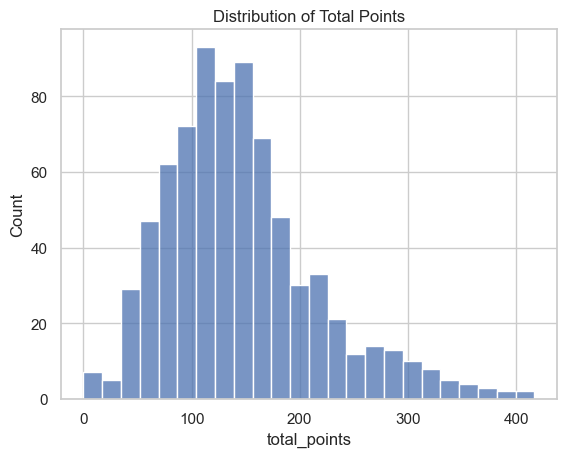

In [440]:
sns.histplot(players_df, x = 'total_points')
plt.title('Distribution of Total Points')

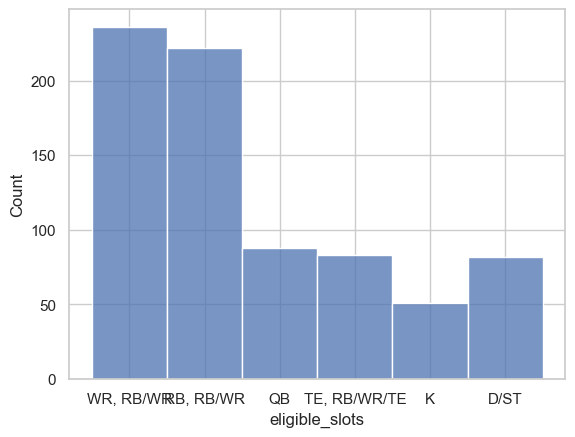

In [446]:
sns.histplot(players_df, x = 'eligible_slots')
plt.show()

F-statistic: 2.6720, P-value: 1.5914e-03


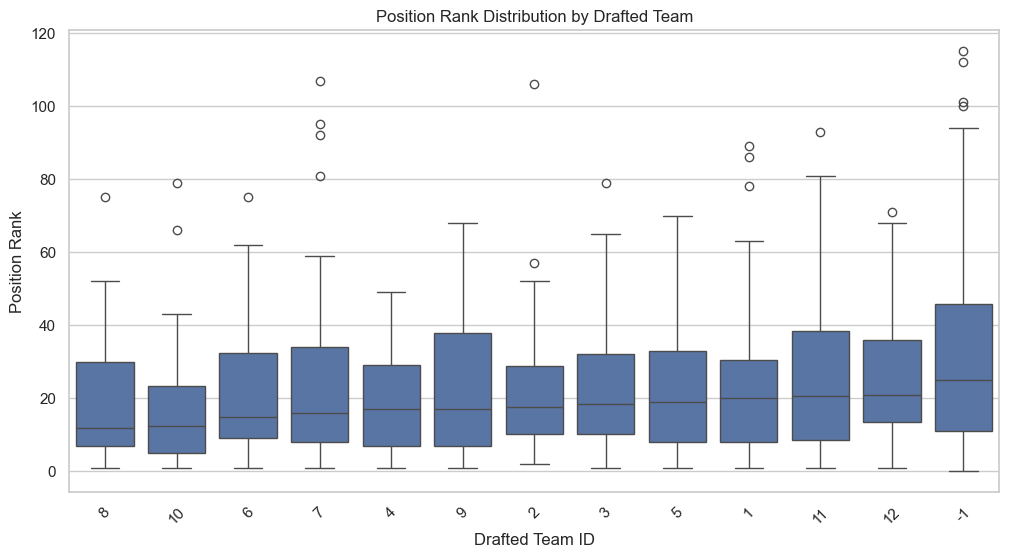

In [442]:
#This plot shows the position rank by drafted team to try to understand if some teams have historically drafted better than others. 
# Evidently, there is significant variation among the teams. It is no surprise that team_id = 8 has won twice in the last 2 years. I happen to be third to last. 
#team_id = 12 has lost for the last 3 years straight. Drafting strength definitely had something to do with it it appears
# Filter data for valid drafted team and position rank
valid_players = players_df.dropna(subset=['drafted_team_id', 'pos_rank'])

# Perform ANOVA
groups = [group['pos_rank'].values for _, group in valid_players.groupby('drafted_team_id')]
f_stat, p_value = f_oneway(*groups)
# Calculate medians and sort drafted teams by median position rank
medians = valid_players.groupby('drafted_team_id')['pos_rank'].median().sort_values()
sorted_teams = medians.index  # Sorted order of drafted_team_id by median

print(f"F-statistic: {f_stat:.4f}, P-value: {p_value:.4e}")
# Boxplot to visualize position rank distribution by team
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=valid_players, 
    x='drafted_team_id', 
    y='pos_rank',
    order=sorted_teams
)
plt.title('Position Rank Distribution by Drafted Team')
plt.xlabel('Drafted Team ID')
plt.ylabel('Position Rank')
plt.xticks(rotation=45)
plt.show()



Correlation: 0.0186, P-value: 9.0918e-01


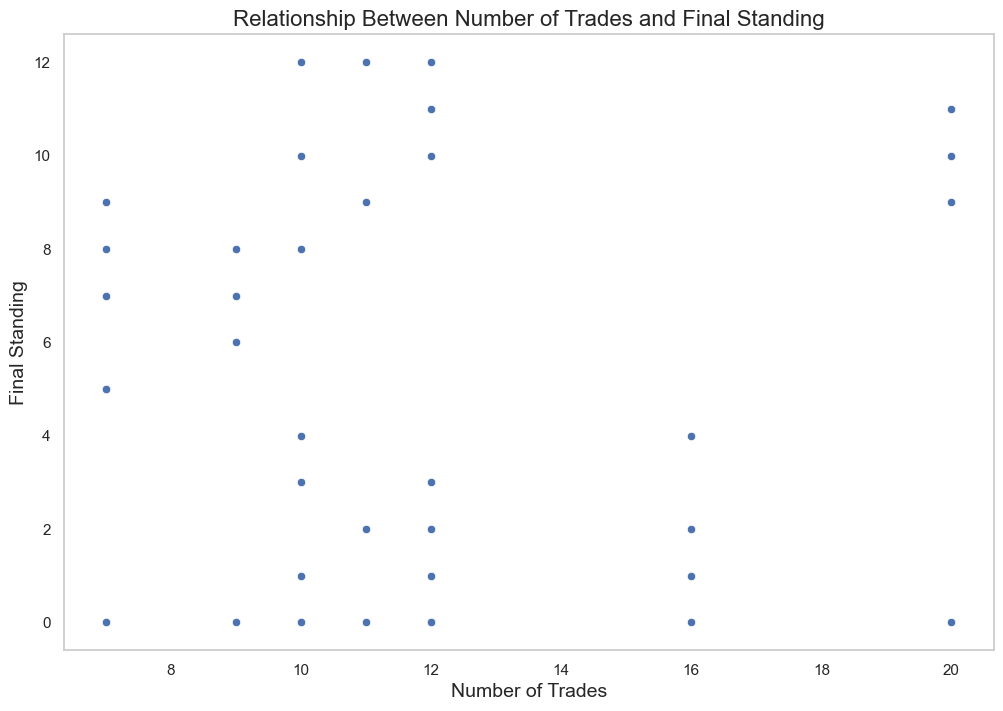

In [449]:
#Attempting to glean whether trade frequency can lead to higher standings... it does not. 
#Count the # of trades for each team_id in players_df
trade_counts = players_df[players_df['acquisition_type'] == 'TRADE'].groupby('team_id').size().reset_index(name='trade_count')

#Merge trade counts with teams_df to include final standings
teams_with_trades = teams_df[['team_id', 'season', 'final_standing']].merge(
    trade_counts, 
    on='team_id', 
    how='inner'
)

# Correlation
correlation, p_value = spearmanr(teams_with_trades['trade_count'], teams_with_trades['final_standing'])
print(f"Correlation: {correlation:.4f}, P-value: {p_value:.4e}")

# Scatterplot to visualize the relationship
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=teams_with_trades, 
    x='trade_count', 
    y='final_standing'
)
plt.title('Relationship Between Number of Trades and Final Standing', fontsize=16)
plt.xlabel('Number of Trades', fontsize=14)
plt.ylabel('Final Standing', fontsize=14)
plt.grid()
plt.show()

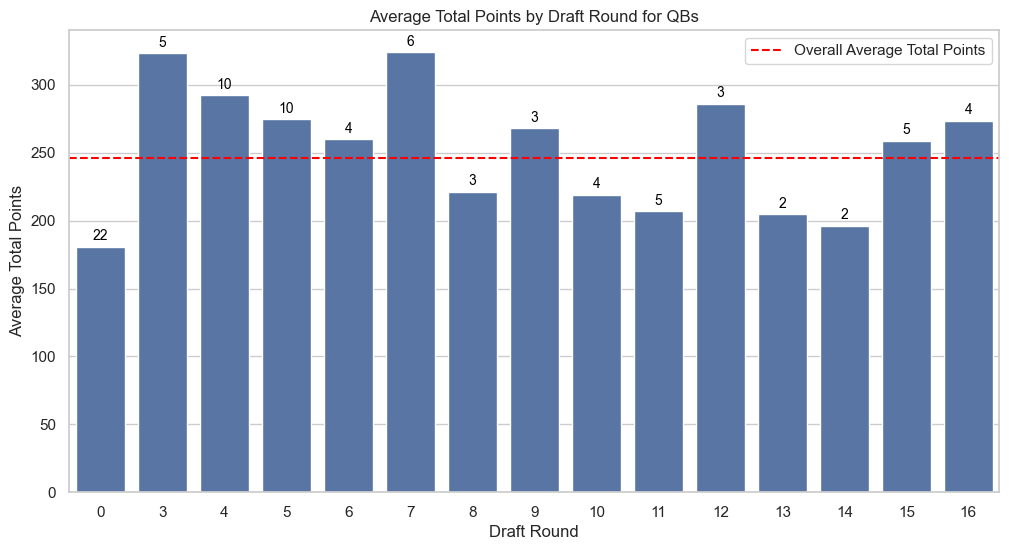

In [444]:
#Bar chart that tries to understand the total points scored by QBs by their average drafted round. 
# Step 1: Filter QB players and calculate stats by round
qbs = players_df[players_df['eligible_slots'].str.contains('QB')].dropna(subset=['round_num', 'total_points'])

# Step 2: Group QBs by round_num
round_stats = qbs.groupby('round_num')['total_points'].agg(['mean', 'count'])

# Step 3: Identify where the dropoff in performance happens (visual inspection)
plt.figure(figsize=(12, 6))

# Barplot: Average total points per round
sns.barplot(x=round_stats.index, y=round_stats['mean'])

# Overlay: Number of QBs drafted as text annotations
for i, count in enumerate(round_stats['count']):
    plt.text(i, round_stats['mean'].iloc[i] + 5, f'{count}', ha='center', fontsize=10, color='black')

# Formatting
plt.title('Average Total Points by Draft Round for QBs')
plt.xlabel('Draft Round')
plt.ylabel('Average Total Points')
plt.axhline(qbs['total_points'].mean(), color='red', linestyle='--', label='Overall Average Total Points')
plt.legend()
plt.show()

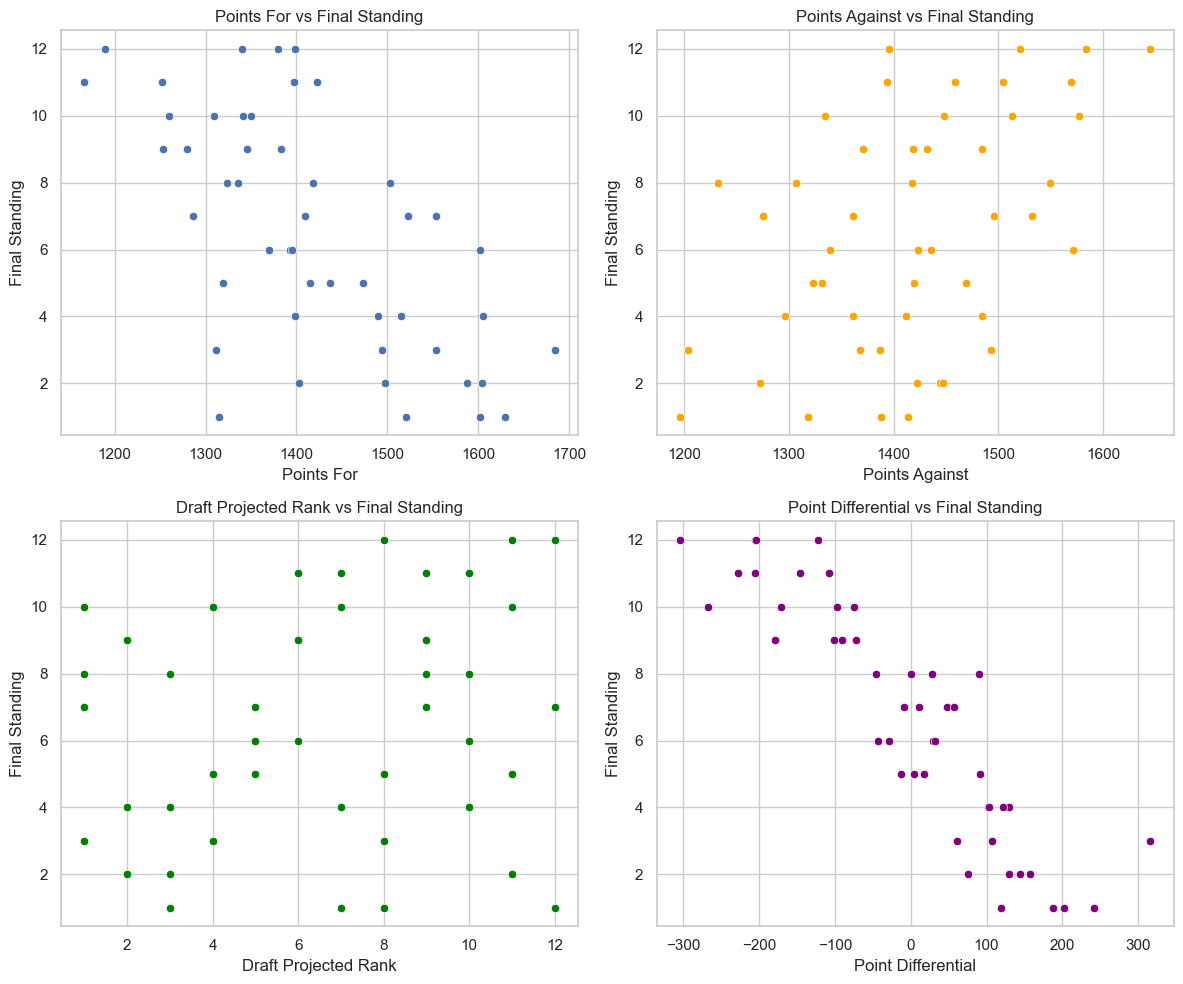

In [452]:
#Now lets understand how correlated final standing is with scoring points and the initial ESPN projection

teams_df['point_differential'] = teams_df['points_for'] - teams_df['points_against']
# Setting up the figure
plt.figure(figsize=(12, 10))

# Plot 1: points_for vs final_standing
plt.subplot(2, 2, 1)
sns.scatterplot(x='points_for', y='standing', data=teams_df)
plt.title('Points For vs Final Standing')
plt.xlabel('Points For')
plt.ylabel('Final Standing')

# Plot 2: points_against vs final_standing
plt.subplot(2, 2, 2)
sns.scatterplot(x='points_against', y='standing', data=teams_df, color='orange')
plt.title('Points Against vs Final Standing')
plt.xlabel('Points Against')
plt.ylabel('Final Standing')

# Plot 3: draft_projected_rank vs final_standing
plt.subplot(2, 2, 3)
sns.scatterplot(x='draft_projected_rank', y='standing', data=teams_df, color='green')
plt.title('Draft Projected Rank vs Final Standing')
plt.xlabel('Draft Projected Rank')
plt.ylabel('Final Standing')


# Plot 3: point_differential vs final_standing
plt.subplot(2, 2, 4)
sns.scatterplot(x='point_differential', y='standing', data=teams_df, color='purple')
plt.title('Point Differential vs Final Standing')
plt.xlabel('Point Differential')
plt.ylabel('Final Standing')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

These relationships depict first and foremost that ESPNs projected final standing on draft day is completely statistically insignificant and should never be taken at face value. The other scatterplots make a lot more sense and the point differential scatterplot being the clearest relationship makes the most sense since wins are predicated on point differential. The points_for and points_against scatterplot should be compared against each other to see how much variance is left to the other teams and how much we can control which can dictate the rest of our analysis. 

                            OLS Regression Results                            
Dep. Variable:               standing   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     92.79
Date:                Sun, 15 Dec 2024   Prob (F-statistic):           1.08e-16
Time:                        14:11:34   Log-Likelihood:                -28.894
No. Observations:                  48   AIC:                             63.79
Df Residuals:                      45   BIC:                             69.40
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2.776e-17      0.066   4.21e

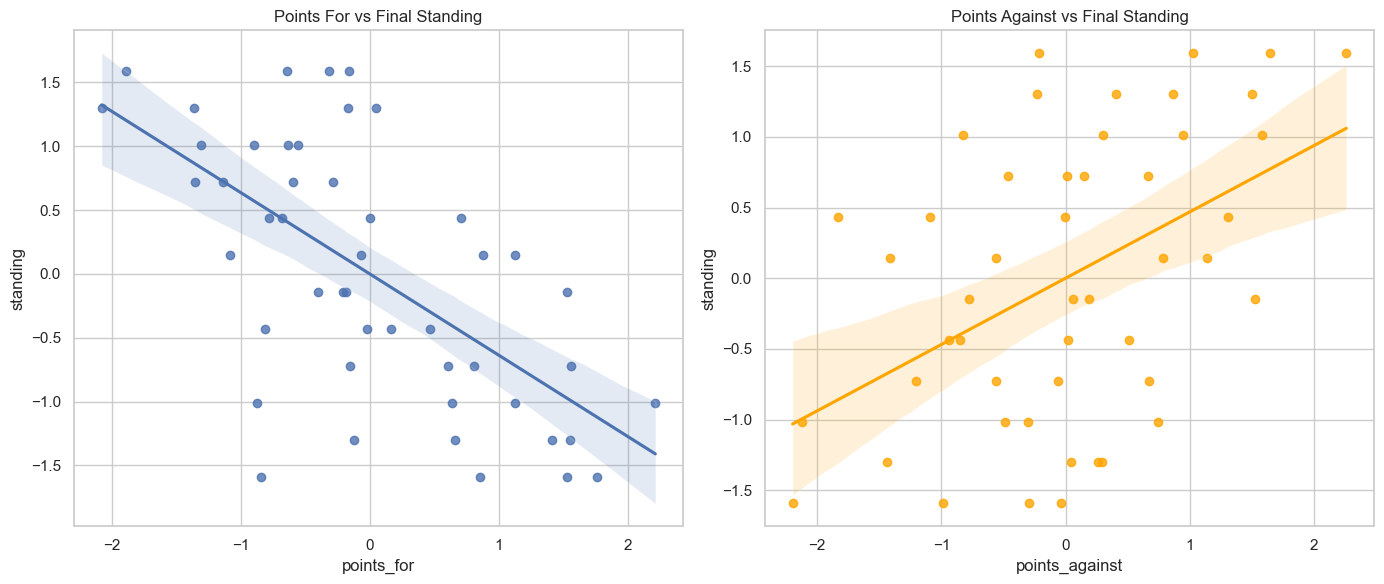

In [456]:
#Seeing if regressing both points_for and points_against for final_standing can tell us which variable has more weight and by how much

# Standardize variables for comparability
scaler = StandardScaler()
teams_df[['points_for', 'points_against', 'standing']] = scaler.fit_transform(
    teams_df[['points_for', 'points_against', 'standing']]
)

# Define independent and dependent variables
X = teams_df[['points_for', 'points_against']]
y = teams_df['standing']

# Add a constant to the model
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print regression summary
print(model.summary())

# Regression plots for each variable
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot regression for points_for vs final_standing
sns.regplot(x='points_for', y='standing', data=teams_df, ax=axes[0])
axes[0].set_title('Points For vs Final Standing')

# Plot regression for points_against vs final_standing
sns.regplot(x='points_against', y='standing', data=teams_df, ax=axes[1], color='orange')
axes[1].set_title('Points Against vs Final Standing')

plt.tight_layout()
plt.show()

Based on the found coefficients, we can calculate the relative contribution of each by dividing each absolute value of the coefficient by the sum of the coefficients. Points_for contributes 55% of the variance in this two variable universe to final standing while points_against contributes 45%. This is slightly comforting that the strength of our own team is slightly more powerful in dictating our own destiny though it is still important to note that 45% of the success in fantasy football is completely out of our hands. Since this analysis is concerned with using statistics to construct the optimal fantasy football strategy, we can assume that we can only control our own variance and as a result, we will focus on attempting to maximize our own point totals. 

#### Univariate & Multivariate Linear Regression Models

Now let us run a few regression models by attempting to understand whether or not a player's relative strength can be predicted from the onset and how much preconceived notions of their performance ultimately resulted in superior outperformance. We will run multiple regressions to see if specific stats denote total points outperformance or position rank as well as whether or not draft position serves as a good predictor for ultimate success. We will also see if their actual NFL team performance ultimately affects individual player outperformance. 

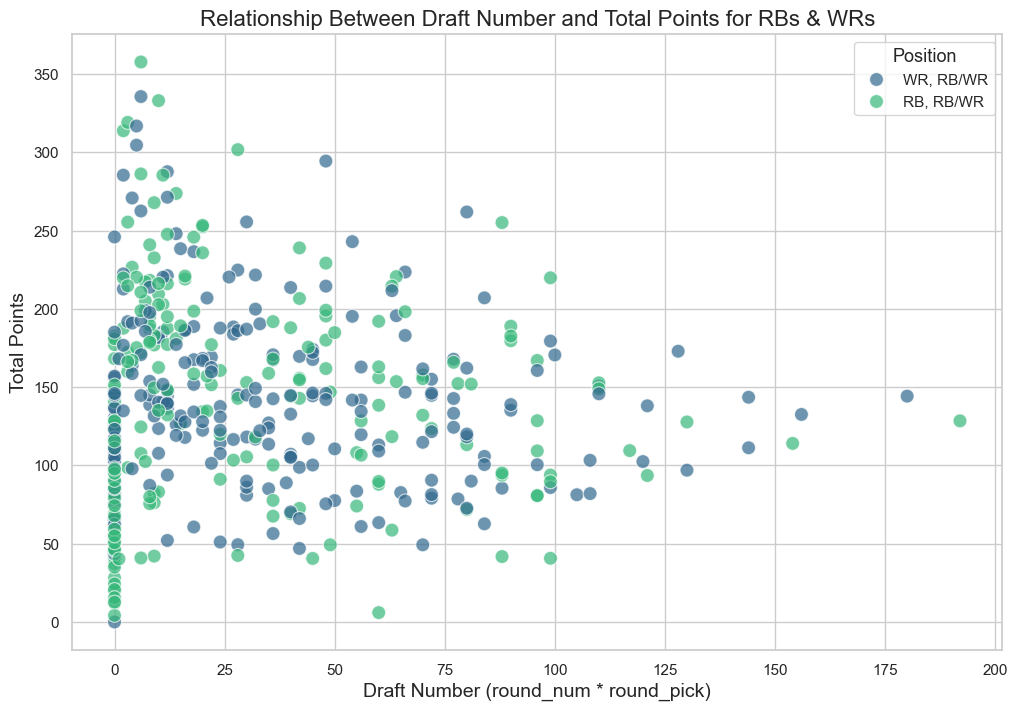

In [438]:
# Define the positions of interest for the scatter plot
positions_of_interest = ["RB, RB/WR", "WR, RB/WR"]

# Filter the DataFrame to include only RBs and WRs
filtered_players = players_df[players_df['eligible_slots'].isin(positions_of_interest)].copy()
filtered_players.dropna(subset=['total_points', 'round_num', 'round_pick'], inplace=True)

# Calculate 'draft_number' as round_num * round_pick
filtered_players['draft_number'] = filtered_players['round_num'] * filtered_players['round_pick']

#Plot
plt.figure(figsize=(12, 8))
scatter_plot = sns.scatterplot(
    data=filtered_players,
    x='draft_number',
    y='total_points',
    hue='eligible_slots',
    palette='viridis',
    s=100,      
    alpha=0.7  
)

plt.title('Relationship Between Draft Number and Total Points for RBs & WRs', fontsize=16)
plt.xlabel('Draft Number (round_num * round_pick)', fontsize=14)
plt.ylabel('Total Points', fontsize=14)

plt.legend(title='Position', title_fontsize='13', fontsize='11')
plt.show()

Number of drafted players: 365
Number of undrafted players: 93


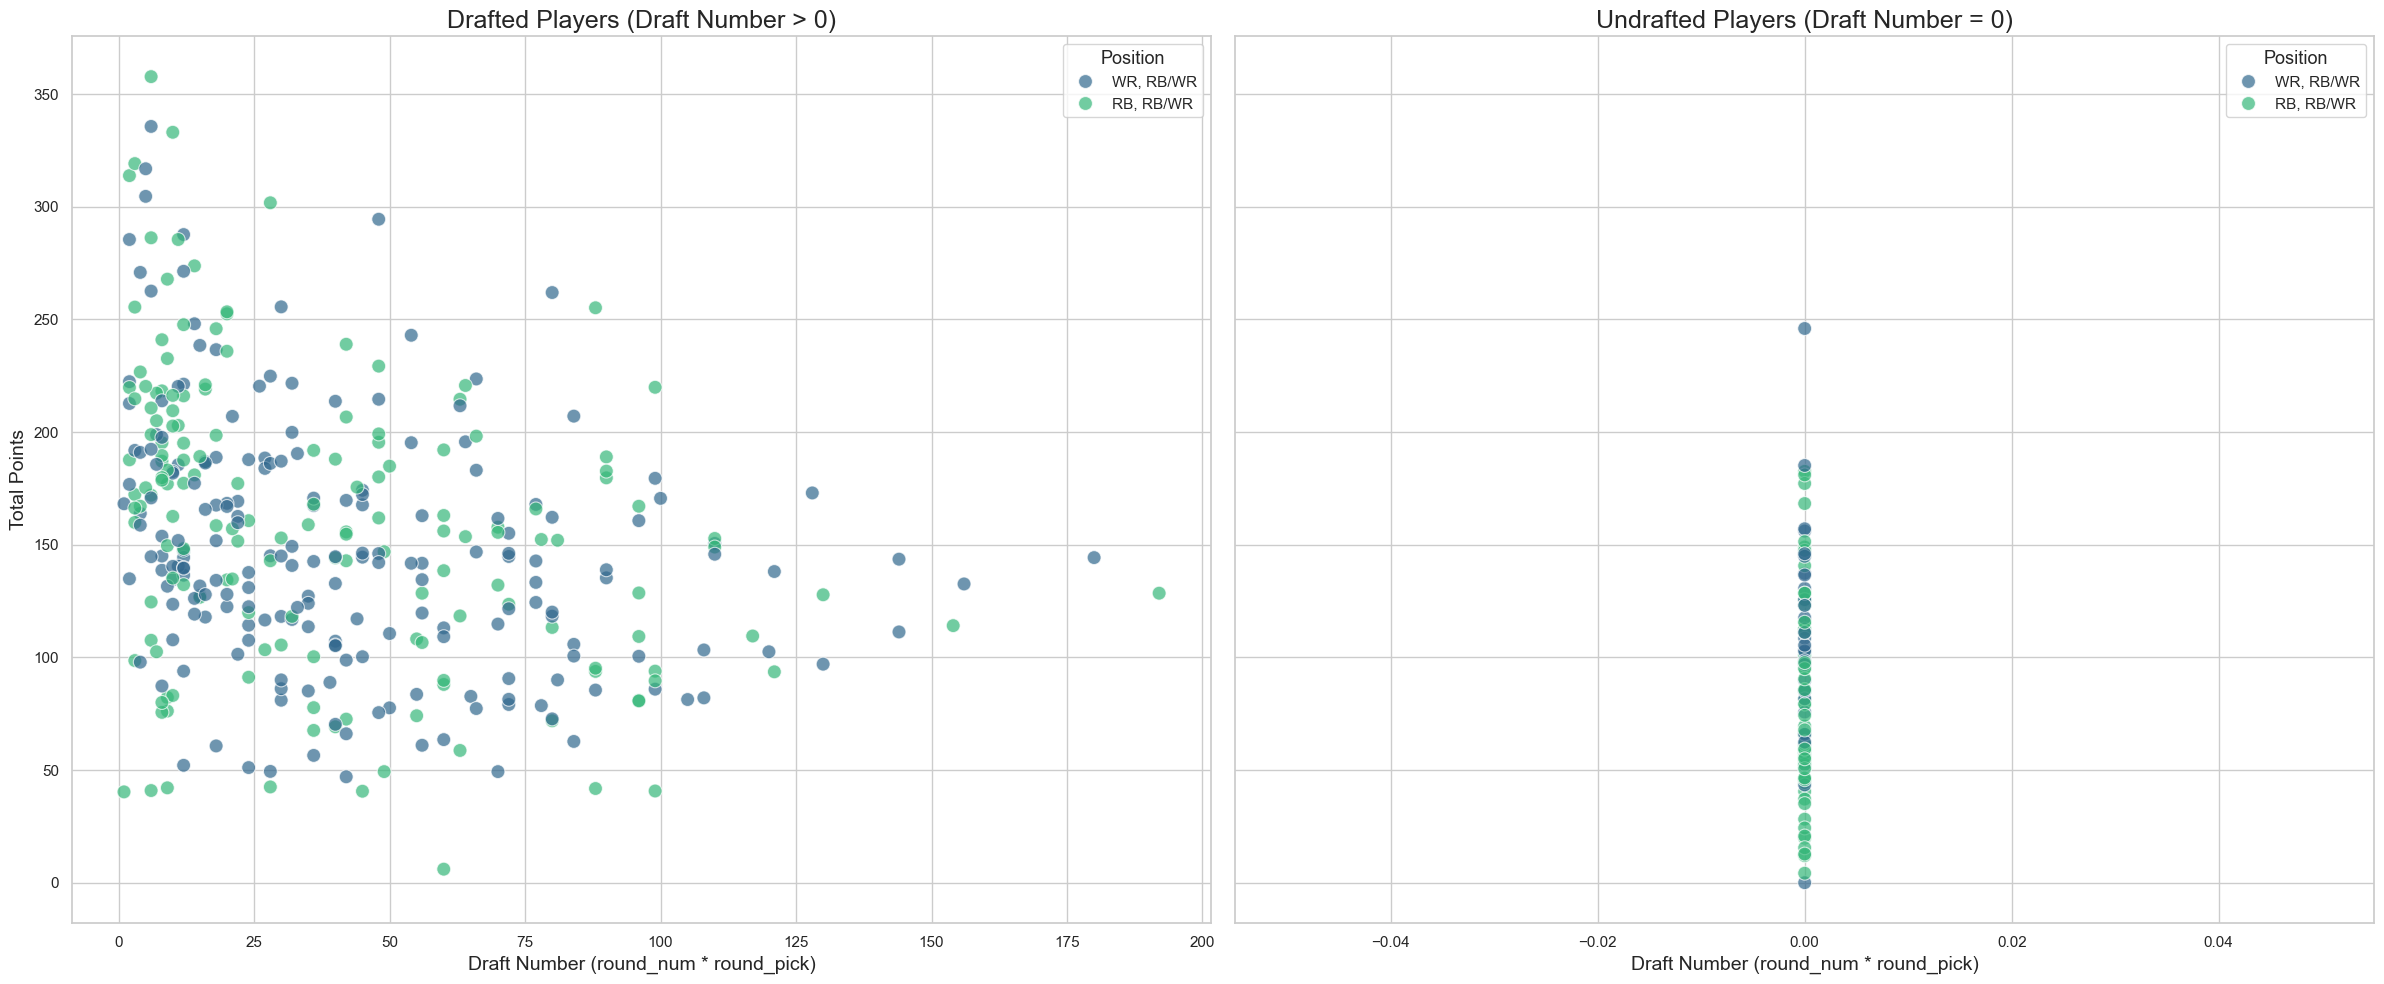


Top 10 Undrafted Players by Total Points:
     player_id            player_name eligible_slots  season  \
406    4426515             Puka Nacua      WR, RB/WR    2023   
522    4362249            Jayden Reed      WR, RB/WR    2023   
90       15807  Cordarrelle Patterson      RB, RB/WR    2021   
520    3051926            Gus Edwards      RB, RB/WR    2023   
405    4429160          De'Von Achane      RB, RB/WR    2023   
313      16782        Jerick McKinnon      RB, RB/WR    2022   
294    3059722              Zay Jones      WR, RB/WR    2022   
182    3135321         Hunter Renfrow      WR, RB/WR    2021   
378    4373626         Tyler Allgeier      RB, RB/WR    2022   
56     3115375        Darrel Williams      RB, RB/WR    2021   

                      team_name  total_points  
406            Hail the Sun God         246.0  
522              Nascar Addison         185.2  
90             Captain Kamarica         182.6  
520              Nascar Addison         181.0  
405         

In [439]:
drafted_players = filtered_players[filtered_players['draft_number'] > 0].copy()
undrafted_players = filtered_players[filtered_players['draft_number'] == 0].copy()

print(f"Number of drafted players: {drafted_players.shape[0]}")
print(f"Number of undrafted players: {undrafted_players.shape[0]}")

#Plot
#Drafted Players Scatterplot
fig, axes = plt.subplots(1, 2, figsize=(24, 10), sharey=True)
sns.scatterplot(
    data=drafted_players,
    x='draft_number',
    y='total_points',
    hue='eligible_slots',
    palette='viridis',
    ax=axes[0],
    s=100,      
    alpha=0.7   
)
axes[0].set_title('Drafted Players (Draft Number > 0)', fontsize=18)
axes[0].set_xlabel('Draft Number (round_num * round_pick)', fontsize=14)
axes[0].set_ylabel('Total Points', fontsize=14)
axes[0].legend(title='Position', title_fontsize='13', fontsize='11')

# Undrafted Players Scatterplot
sns.scatterplot(
    data=undrafted_players,
    x='draft_number',
    y='total_points',
    hue='eligible_slots',
    palette='viridis',
    ax=axes[1],
    s=100,     
    alpha=0.7   
)
axes[1].set_title('Undrafted Players (Draft Number = 0)', fontsize=18)
axes[1].set_xlabel('Draft Number (round_num * round_pick)', fontsize=14)
axes[1].set_ylabel('Total Points', fontsize=14)
axes[1].legend(title='Position', title_fontsize='13', fontsize='11')
plt.tight_layout()
plt.show()

# Top 10 Undrafted Players
required_columns = ['season', 'team_name']
missing_columns = [col for col in required_columns if col not in undrafted_players.columns]
if missing_columns:
    print(f"Error: The following required columns are missing in the DataFrame: {missing_columns}")
else:
    top_10_undrafted = undrafted_players.sort_values(by='total_points', ascending=False).head(10)
    print("\nTop 10 Undrafted Players by Total Points:")
    print(top_10_undrafted[['player_id', 'player_name', 'eligible_slots', 'season', 'team_name', 'total_points']])


It is clear here that while there is a slight negative relationship between a lower draft number and higher points, distribution of RBs and WRs, the main drivers of fantasy points, almost looks like a normal distribution. However, when you look at the undrafted plot, it is clear that total points doesn't usually eclips the halfway point of at least the top 75 picks which reveals that perhaps, there is a level of competence in draft picking. Let's now put some statistical evidence behind this relationship with some linear regressions. 

                            OLS Regression Results                            
Dep. Variable:           total_points   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     40.38
Date:                Sun, 15 Dec 2024   Prob (F-statistic):           6.28e-10
Time:                        14:23:56   Log-Likelihood:                -1992.8
No. Observations:                 365   AIC:                             3990.
Df Residuals:                     363   BIC:                             3997.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          175.3052      4.565     38.399   

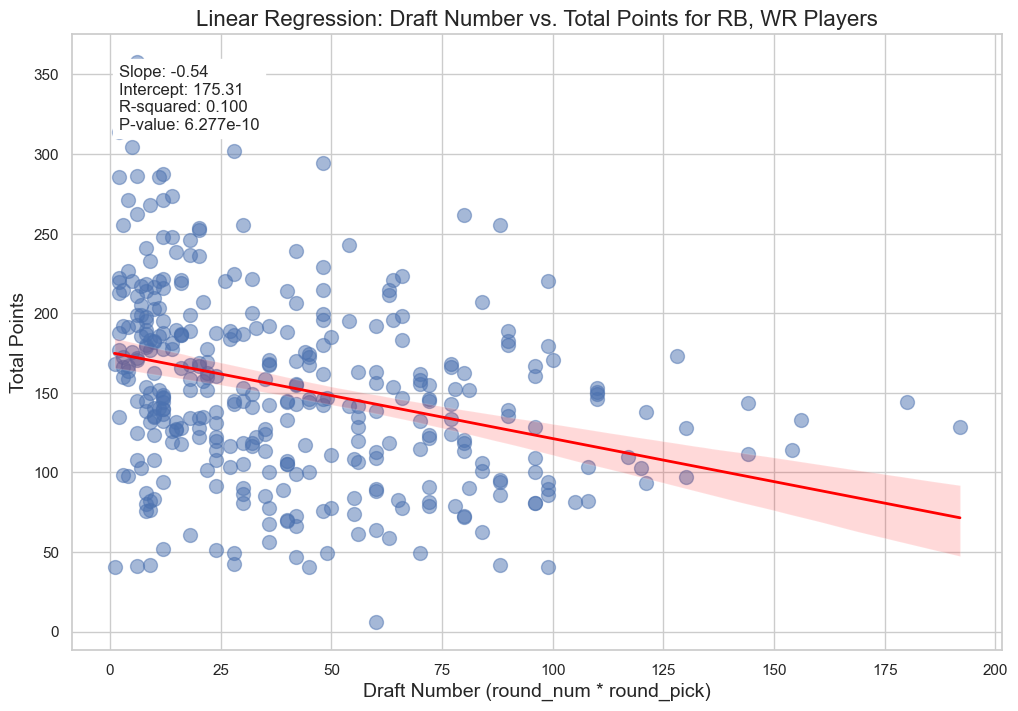

In [460]:
# Define the independent variable (draft_number) and dependent variable (total_points)
X_drafted = drafted_players['draft_number']
y_drafted = drafted_players['total_points']
X_drafted = sm.add_constant(X_drafted)

model = sm.OLS(y_drafted,X_drafted ).fit()

print(model.summary())

# Create a scatterplot with a regression line
plt.figure(figsize=(12, 8))
sns.regplot(
    data=drafted_players,
    x='draft_number',
    y='total_points',
    scatter=True,
    fit_reg=True,
    scatter_kws={'s': 100, 'alpha': 0.5},
    line_kws={'color': 'red', 'linewidth': 2}
)
plt.title('Linear Regression: Draft Number vs. Total Points for RB, WR Players', fontsize=16)
plt.xlabel('Draft Number (round_num * round_pick)', fontsize=14)
plt.ylabel('Total Points', fontsize=14)

slope = model.params['draft_number']
intercept = model.params['const']
r_squared = model.rsquared
p_value = model.pvalues['draft_number']
annotation_text = f"Slope: {slope:.2f}\nIntercept: {intercept:.2f}\nR-squared: {r_squared:.3f}\nP-value: {p_value:.3e}"
plt.annotate(
    annotation_text,
    xy=(0.05, 0.95),
    xycoords='axes fraction',
    fontsize=12,
    backgroundcolor='white',
    verticalalignment='top'
)
plt.show()

With a significant P-value, we can now prove that draft number IS correlated with total fantasy points scored. However with an R^2 of .100, this model can only predict 10% of the variance in total points which proves that the drafting ability of the teams in my league could definitely be improved and that there is statistical evidence that sleeper picks exist (any player located above the regression line) and are available for the taking. 

In [461]:
# Calculate the number of points above the regression line
above_line = np.sum(y_drafted > y_pred)

total_points = len(y_drafted)
percentage_above = (above_line / total_points) * 100

print(f"Percentage of points above the regression line: {percentage_above:.2f}%")

Percentage of points above the regression line: 47.67%


This means that 47% of the players that have been drafted had a higher value than their predicted draft value! This should dispel fears during a draft that all the "good" players have been taken. Now lets investigate if this same relationship exists with Quarterbacks

Number of drafted QBs: 66
Number of undrafted QBs: 22

Linear Regression Summary for Drafted QBs:
                            OLS Regression Results                            
Dep. Variable:           total_points   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     8.345
Date:                Sun, 15 Dec 2024   Prob (F-statistic):            0.00527
Time:                        00:36:51   Log-Likelihood:                -369.78
No. Observations:                  66   AIC:                             743.6
Df Residuals:                      64   BIC:                             747.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

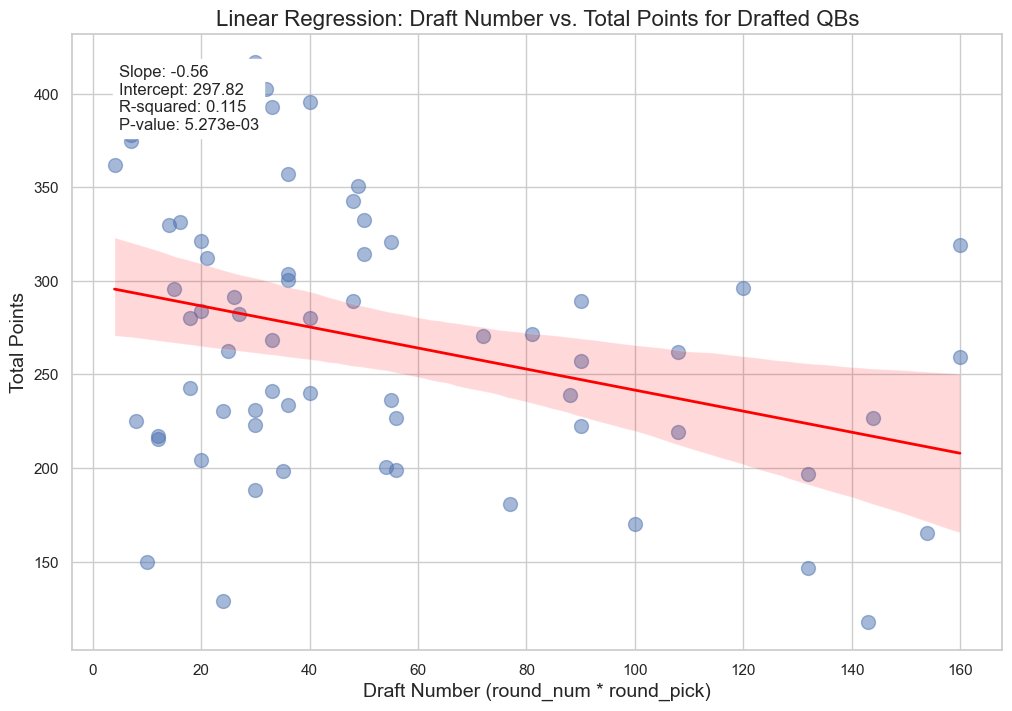

In [329]:
#QB Plot
positions_of_interest_qb = ["QB"]
filtered_players_qb = players_df[players_df['eligible_slots'].isin(positions_of_interest_qb)].copy()
filtered_players_qb.dropna(subset=['total_points', 'round_num', 'round_pick'], inplace=True)

filtered_players_qb['draft_number'] = filtered_players_qb['round_num'] * filtered_players_qb['round_pick']

drafted_qbs = filtered_players_qb[filtered_players_qb['draft_number'] > 0].copy()
undrafted_qbs = filtered_players_qb[filtered_players_qb['draft_number'] == 0].copy()

print(f"Number of drafted QBs: {drafted_qbs.shape[0]}")
print(f"Number of undrafted QBs: {undrafted_qbs.shape[0]}")

X_qb = drafted_qbs['draft_number']
y_qb = drafted_qbs['total_points']
X_qb = sm.add_constant(X_qb)
    
model_qb = sm.OLS(y_qb, X_qb).fit()
    
print("\nLinear Regression Summary for Drafted QBs:")
print(model_qb.summary())


# Plot
plt.figure(figsize=(12, 8))
sns.regplot(
        data=drafted_qbs,
        x='draft_number',
        y='total_points',
        scatter=True,
        fit_reg=True,
        scatter_kws={'s': 100, 'alpha': 0.5},
        line_kws={'color': 'red', 'linewidth': 2}
    )
    
plt.title('Linear Regression: Draft Number vs. Total Points for Drafted QBs', fontsize=16)
plt.xlabel('Draft Number (round_num * round_pick)', fontsize=14)
plt.ylabel('Total Points', fontsize=14)

slope_qb = model_qb.params['draft_number']
intercept_qb = model_qb.params['const']
r_squared_qb = model_qb.rsquared
p_value_qb = model_qb.pvalues['draft_number']
    
annotation_text_qb = (
        f"Slope: {slope_qb:.2f}\n"
        f"Intercept: {intercept_qb:.2f}\n"
        f"R-squared: {r_squared_qb:.3f}\n"
        f"P-value: {p_value_qb:.3e}"
    )
    
plt.annotate(
        annotation_text_qb,
        xy=(0.05, 0.95),
        xycoords='axes fraction',
        fontsize=12,
        backgroundcolor='white',
        verticalalignment='top'
    )
plt.show()

Now we look at the QB relationship and unsurprisingly the scatterplot is a lot more sparsely populated. It seems that generally, QBs chosen in the first 5 rounds significantly outperform any other round after that, but that there is little reason to draft a QB in the 1st round since competent QBs can fall to the 4th and 5th round quite frequently. Now I will prepare the data to do position specific analysis:

In [470]:
#Realizing that I can just create position specific dataframes here
positions = ['QB', 'TE, RB/WR/TE','RB, RB/WR', 'WR, RB/WR', 'D/ST', 'K']
position_dfs = {}
#Loop through each position
for pos in positions:
    pos_df = players_df[players_df['eligible_slots'] == pos].copy()
    pos_df.dropna(subset=['total_points', 'round_num', 'round_pick'], inplace=True)
    pos_df['draft_number'] = pos_df['round_num'] * pos_df['round_pick']
    position_dfs[pos] = pos_df
    
    print(f"Number of {pos} players: {pos_df.shape[0]}")

Number of QB players: 88
Number of TE, RB/WR/TE players: 83
Number of RB, RB/WR players: 222
Number of WR, RB/WR players: 236
Number of D/ST players: 82
Number of K players: 51


In [471]:
#Acquisition_type is a categorical variable with ADD, TRADE, DRAFTED so lets encode it
encoder = OneHotEncoder(drop='first', sparse_output=False)

def encode_acquisition_type(df):
    if 'acquisition_type' in df.columns:
        acquisition_type = df[['acquisition_type']]
        
        encoded = encoder.fit_transform(acquisition_type)
        
        encoded_cols = encoder.get_feature_names_out(['acquisition_type'])
        
        encoded_df = pd.DataFrame(encoded, columns=encoded_cols, index=df.index)
        
        df = pd.concat([df, encoded_df], axis=1)
        
        df.drop('acquisition_type', axis=1, inplace=True)
    
    return df

for pos, df in position_dfs.items():
    position_dfs[pos] = encode_acquisition_type(df)
    print(f"Encoded 'acquisition_type' for {pos} players.")

Encoded 'acquisition_type' for QB players.
Encoded 'acquisition_type' for TE, RB/WR/TE players.
Encoded 'acquisition_type' for RB, RB/WR players.
Encoded 'acquisition_type' for WR, RB/WR players.
Encoded 'acquisition_type' for D/ST players.
Encoded 'acquisition_type' for K players.


In [472]:
#Defining the specific player statistic variables for the subsequent analysis
common_vars = [
    'drafted_team_id',
    'draft_number',
    'actual_teamWin',
    'actual_teamLoss',
    'actual_pointsScored',
    'actual_fumbles',
    'percent_owned',
    'percent_started',
    'on_team_id'
]

# Position-specific variables
position_specific_vars = {
    'QB': [
        'actual_passingAttempts',
        'actual_passingCompletions',
        'actual_passingIncompletions',
        'actual_passingYards',
        'actual_passingTouchdowns',
        'actual_passingInterceptions',
        'actual_passingCompletionPercentage',
        'actual_turnovers'
    ],
    'TE, RB/WR/TE': [
        'actual_receivingReceptions',
        'actual_receivingYards',
        'actual_receivingTouchdowns',
        'actual_receivingTargets',
        'actual_receivingYardsAfterCatch',
        'actual_receivingYardsPerReception'
    ],
    'WR, RB/WR': [
        'actual_receivingReceptions',
        'actual_receivingYards',
        'actual_receivingTouchdowns',
        'actual_receivingTargets',
        'actual_receivingYardsAfterCatch',
        'actual_receivingYardsPerReception',
    ],
    'RB, RB/WR': [
        'actual_rushingTouchdowns',
        'actual_rushingAttempts',
        'actual_rushingYards',
        'actual_rushingYardsPerAttempt'
    ],
    'D/ST': [
        'actual_defensiveTouchdowns',
        'actual_defensiveInterceptions',
        'actual_defensiveSacks',
        'actual_defensiveForcedFumbles',
        'actual_defensivePointsAllowed',
        'actual_defensiveYardsAllowed',
        'actual_defensiveTotalTackles'
    ],
    'K': [
        'actual_madeFieldGoals',
        'actual_attemptedFieldGoals',
        'actual_missedFieldGoals',
        'actual_madeExtraPoints',
        'actual_attemptedExtraPoints',
        'actual_missedExtraPoints'
    ]
}

position_vars = {}

for pos in position_dfs.keys():
    vars_list = common_vars.copy()  
    vars_list += position_specific_vars.get(pos, [])
    encoded_cols = [col for col in position_dfs[pos].columns if 'acquisition_type_' in col]
    vars_list += encoded_cols
    # Exclude 'total_points' as it's the dependent variable
    vars_list = [var for var in vars_list if var != 'total_points']
    position_vars[pos] = vars_list
    print(f"Variables for {pos}: {vars_list}")

Variables for QB: ['drafted_team_id', 'draft_number', 'actual_teamWin', 'actual_teamLoss', 'actual_pointsScored', 'actual_fumbles', 'percent_owned', 'percent_started', 'on_team_id', 'actual_passingAttempts', 'actual_passingCompletions', 'actual_passingIncompletions', 'actual_passingYards', 'actual_passingTouchdowns', 'actual_passingInterceptions', 'actual_passingCompletionPercentage', 'actual_turnovers', 'acquisition_type_DRAFT', 'acquisition_type_TRADE']
Variables for TE, RB/WR/TE: ['drafted_team_id', 'draft_number', 'actual_teamWin', 'actual_teamLoss', 'actual_pointsScored', 'actual_fumbles', 'percent_owned', 'percent_started', 'on_team_id', 'actual_receivingReceptions', 'actual_receivingYards', 'actual_receivingTouchdowns', 'actual_receivingTargets', 'actual_receivingYardsAfterCatch', 'actual_receivingYardsPerReception', 'acquisition_type_DRAFT', 'acquisition_type_TRADE']
Variables for RB, RB/WR: ['drafted_team_id', 'draft_number', 'actual_teamWin', 'actual_teamLoss', 'actual_points

Now lets find what the best combination of player stats can predict total points for each respective position with the highest statistical significance. Using this find_all_regressions function, I systematically evaluate all possible combinations of 3 independant variables and select the model with the highest adjusted R^2 to penalize for overfitting. Generally, I am looking to find that the independant variables found are the player statistics that directly contribute the most to points such as touchdowns, reception yards, and rushing yards. 

In [487]:
def find_all_regressions(df, independent_vars, dependent_var='total_points', max_vars=3):
    """
    Finds all possible regressions for combinations of independent variables (up to max_vars)
    and calculates Adjusted R-squared for each.

    Parameters:
    - df (pd.DataFrame): The DataFrame containing the data.
    - independent_vars (list): List of independent variable names.
    - dependent_var (str): The name of the dependent variable.
    - max_vars (int): Maximum number of variables in the regression.

    Returns:
    - results (list): A list of tuples containing:
        (variable combination, adjusted R-squared)
    """
    results = []

    for k in range(1, max_vars + 1):
        for combo in combinations(independent_vars, k):
            subset = df[list(combo) + [dependent_var]].replace([np.inf, -np.inf], np.nan).dropna()

            # Define independent and dependent variables
            X = subset[list(combo)]
            y = subset[dependent_var]
            X = sm.add_constant(X)

            # Fit the model
            try:
                model = sm.OLS(y, X).fit()
                adj_r2 = model.rsquared_adj

                # Append the combination and Adjusted R-squared to results
                results.append((combo, adj_r2))
            except Exception as e:
                print(f"Failed to fit model for combination {combo}: {e}")
                continue

    return results

In [488]:
# Initialize a dictionary to store all regression results for each position
all_regression_results = {}

# Initialize a dictionary to store the top 10 regression results for each position
top_10_regression_results = {}

# Iterate through each position
for pos, df in position_dfs.items():
    print(f"\n--- Regression Analysis for {pos} ---")
    
    vars_list = position_vars.get(pos, [])
    regression_results = find_all_regressions(
        df,
        vars_list,
        dependent_var='total_points',
        max_vars=3
    )
    
    # Debugging
    print(f"Number of regression models found: {len(regression_results)}")
    if regression_results:
        print(f"First few regression results for {pos}: {regression_results[:3]}")
    
    if not regression_results:
        print(f"No successful regression models found for {pos}.")
        continue
    
    # Store all regression results
    all_regression_results[pos] = regression_results
    
    # Convert the results to a DataFrame for easier manipulation
    try:
        results_df = pd.DataFrame(regression_results, columns=['Variable_Combination', 'Adjusted_R2'])
    except Exception as e:
        print(f"Error creating DataFrame for {pos}: {e}")
        continue
    
    # Sort the DataFrame by Adjusted R² 
    results_df_sorted = results_df.sort_values(by='Adjusted_R2', ascending=False)
    
    # Extract the top 10 models
    top_10 = results_df_sorted.head(10)
    
    # Store the top 10 regression results
    top_10_regression_results[pos] = top_10
    print(f"Top 10 Adjusted R² for {pos}:")
    print(top_10.to_string(index=False))


--- Regression Analysis for QB ---
Number of regression models found: 1159
First few regression results for QB: [(('drafted_team_id',), np.float64(0.14318661769374774)), (('draft_number',), np.float64(-0.010587850775242824)), (('actual_teamWin',), np.float64(0.5712066435584647))]
Top 10 Adjusted R² for QB:
                                                        Variable_Combination  Adjusted_R2
     (actual_pointsScored, actual_passingAttempts, actual_passingTouchdowns)     0.947675
  (actual_pointsScored, actual_passingCompletions, actual_passingTouchdowns)     0.946121
(actual_pointsScored, actual_passingIncompletions, actual_passingTouchdowns)     0.945224
           (actual_pointsScored, percent_owned, actual_passingIncompletions)     0.939425
                       (actual_teamLoss, actual_pointsScored, percent_owned)     0.934835
            (actual_teamLoss, actual_pointsScored, actual_passingTouchdowns)     0.933233
                (actual_pointsScored, percent_owned, actual_p

We found that across all position, actual_pointsScored is a consistent predictor which makes sense because the points scored is based on the amount of points they score in real life. Though its only one factor, it is clearly a very strong factor though there may be signs of multi-collinearity connected to this relationship. There was lower predictability for D/ST due to a significant amount of external factors such as opposing offenses and a lot more moving parts that determine their scoring which was not present, not to mention less of a sample size. Now lets plot the primary predictor for each position. 

In [480]:
# Initialize a dictionary to store the best regression results for each position
best_regression_results_specific = {}

for pos, top_10 in top_10_regression_results.items():
    # Extract the top model (first row) for the current position
    best_combo = top_10.iloc[0]['Variable_Combination']
    best_adj_r2 = top_10.iloc[0]['Adjusted_R2']
    
    # Prepare the data for the best combination
    subset = position_dfs[pos][list(best_combo) + ['total_points']].replace([np.inf, -np.inf], np.nan).dropna()
    
    # Define variables
    X = subset[list(best_combo)]
    y = subset['total_points']
    X = sm.add_constant(X)
    
    # Fit the model
    try:
        model = sm.OLS(y, X).fit()
        # Store the results in the new dictionary
        best_regression_results_specific[pos] = {
            'Best Combination': best_combo,
            'Adjusted R-squared': model.rsquared_adj,
            'Model': model
        }
        print(f"Stored best model for {pos} with Adjusted R²: {model.rsquared_adj:.4f}")
    except Exception as e:
        print(f"Failed to fit the best model for {pos}: {e}")

Stored best model for QB with Adjusted R²: 0.9477
Stored best model for TE, RB/WR/TE with Adjusted R²: 0.8732
Stored best model for RB, RB/WR with Adjusted R²: 0.9328
Stored best model for WR, RB/WR with Adjusted R²: 0.9184
Stored best model for D/ST with Adjusted R²: 0.7578
Stored best model for K with Adjusted R²: 0.9668



--- Visualization for QB ---


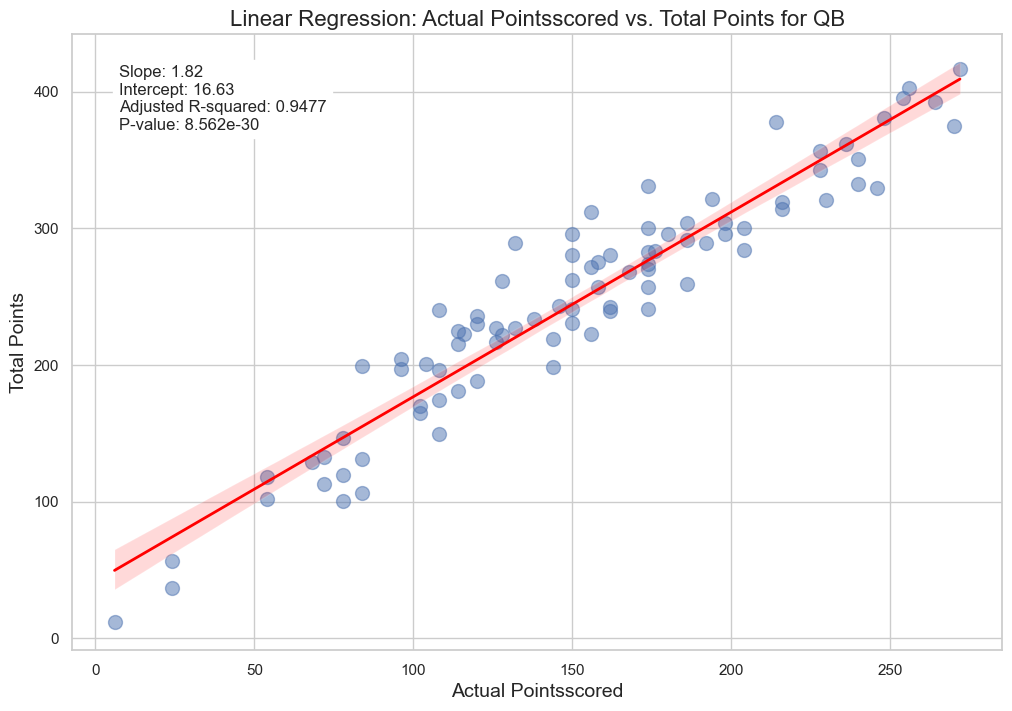


--- Visualization for TE, RB/WR/TE ---


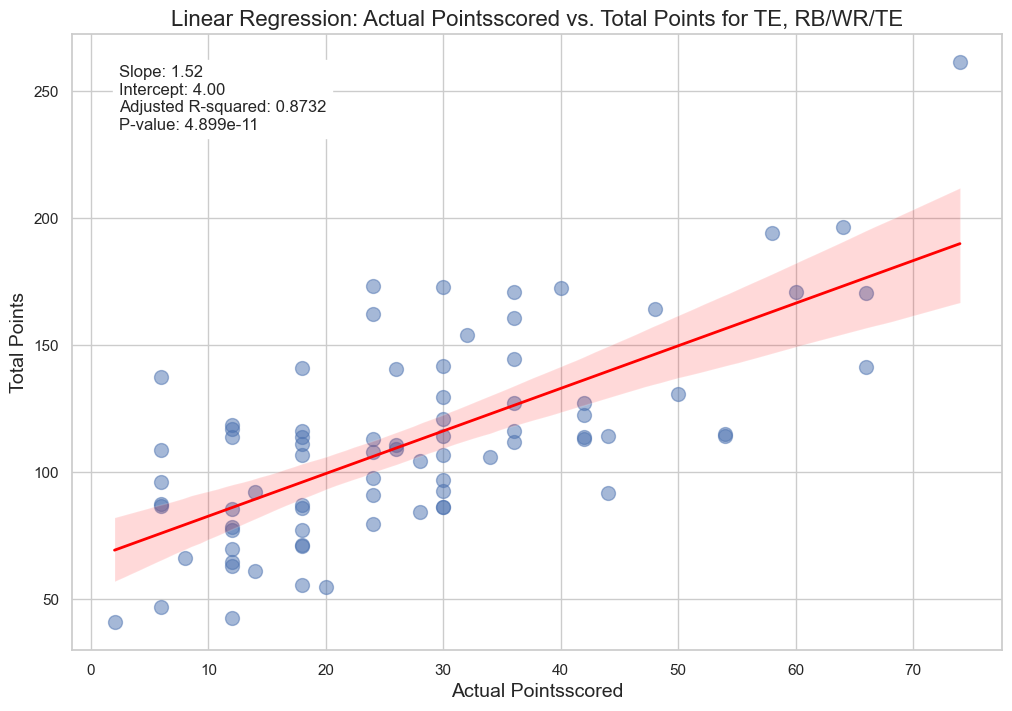


--- Visualization for RB, RB/WR ---


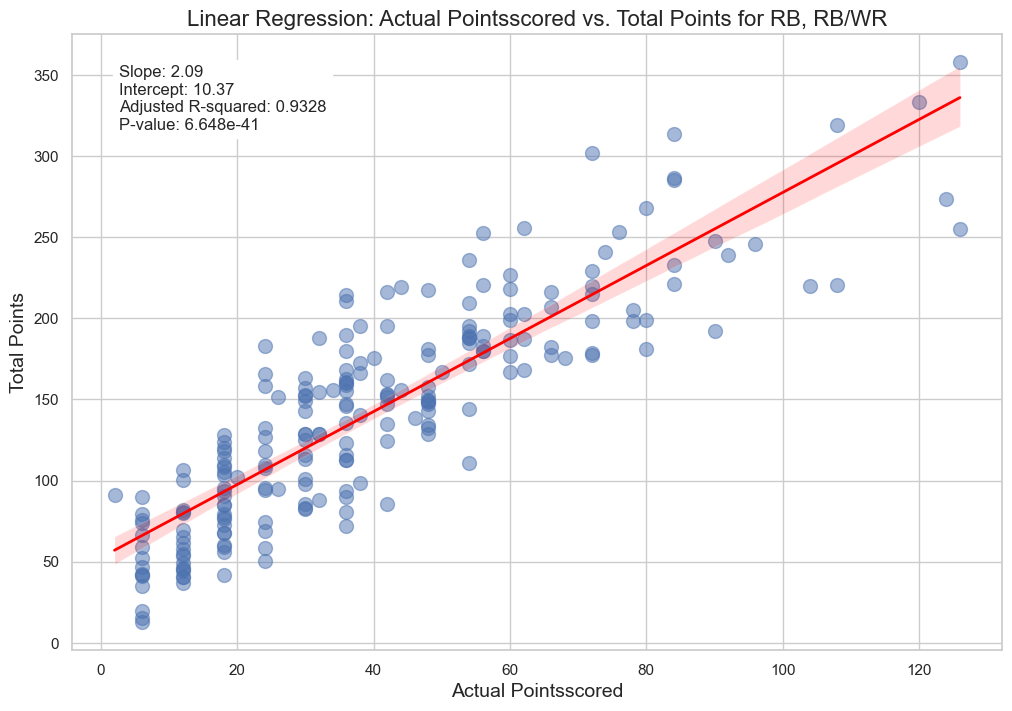


--- Visualization for WR, RB/WR ---


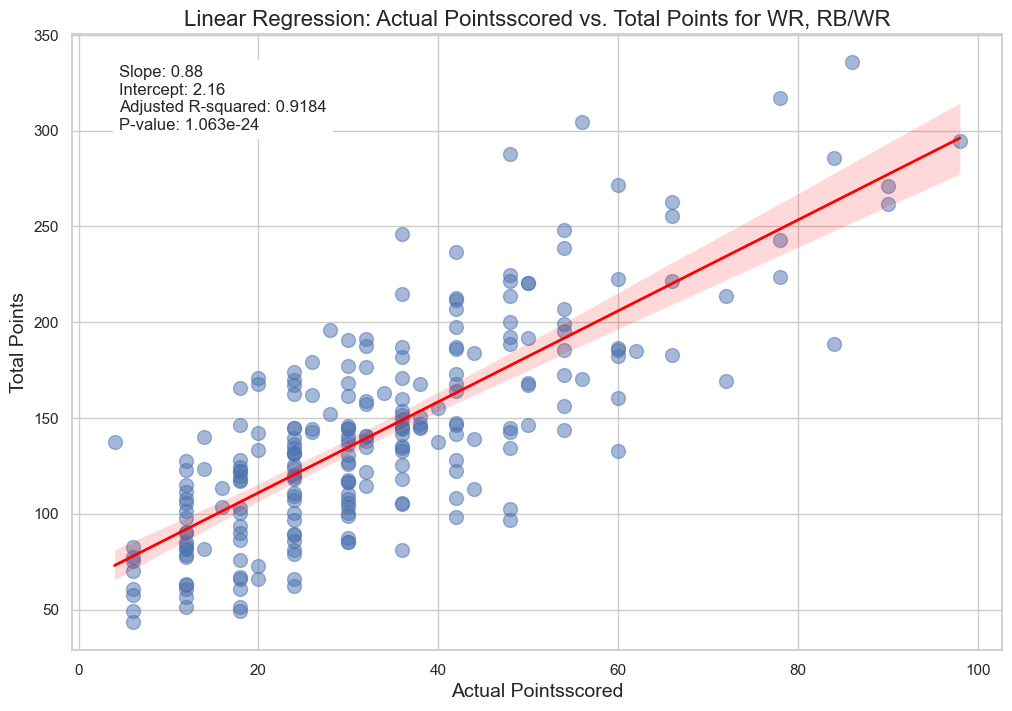


--- Visualization for D/ST ---


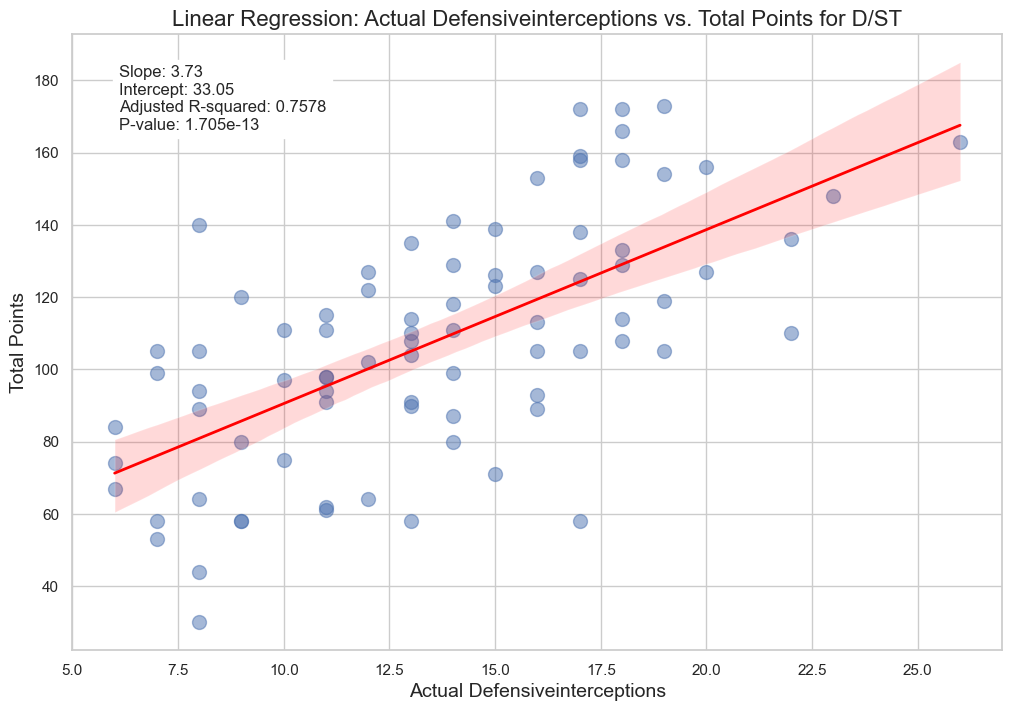


--- Visualization for K ---


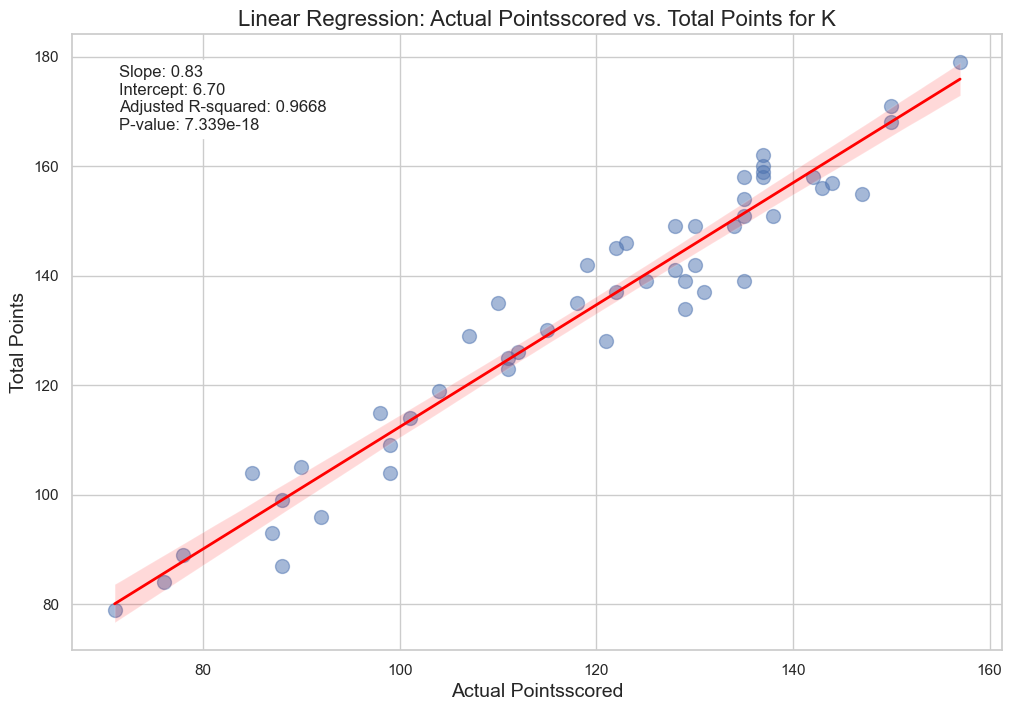

In [489]:
#Plotting the Best Models
for pos, result in best_regression_results_specific.items(): 
    print(f"\n--- Visualization for {pos} ---")
    
    # Extract the best combination and the model
    best_combo = result['Best Combination']
    best_model = result['Model']
    primary_predictor = best_combo[0]
    # Create a scatterplot with a regression line
    plt.figure(figsize=(12, 8))
    sns.regplot(
        x=primary_predictor,
        y='total_points',
        data=position_dfs[pos],
        scatter=True,
        fit_reg=True,
        scatter_kws={'s': 100, 'alpha': 0.5},
        line_kws={'color': 'red', 'linewidth': 2}
    )
    plt.title(f'Linear Regression: {primary_predictor.replace("_", " ").title()} vs. Total Points for {pos}', fontsize=16)
    plt.xlabel(primary_predictor.replace('_', ' ').title(), fontsize=14)
    plt.ylabel('Total Points', fontsize=14)
    
    slope = best_model.params.get(primary_predictor, None)
    intercept = best_model.params.get('const', None)
    r_squared = best_model.rsquared_adj
    p_value = best_model.pvalues.get(primary_predictor, None)
    
    if slope is not None and intercept is not None and p_value is not None:
        annotation_text = (
            f"Slope: {slope:.2f}\n"
            f"Intercept: {intercept:.2f}\n"
            f"Adjusted R-squared: {r_squared:.4f}\n"
            f"P-value: {p_value:.3e}"
        )
        
        plt.annotate(
            annotation_text,
            xy=(0.05, 0.95),
            xycoords='axes fraction',
            fontsize=12,
            backgroundcolor='white',
            verticalalignment='top'
        )
    
    plt.show() 

Overall, points scored seems to be the biggest predictor. The explanation in why the QB plot seems much more fitted is because of the weighting that QBs points are calculated. Touchdowns are 4 points while 100 yards passing is also 4 points. On the contrary, for RBs, WRs, and TEs, touchdowns are 6 points while 10 yards reception or 10 yards rushing is 1 point. Receivers also receive half a point for every reception. This scoring discrepancy is observed clearly in the plots. Additionally, kickers usually get 3 points for every field goal and is scaled up for longer field goals. Defenses on the other hand, obtain points through a myriad of ways including holding opponents to certain scores and yardage and only get 2 points for every interceptions. However, an interception in football usually signifies a turnover in possession and can be an important indicator for relative strength. However, its clear that the variables involved are too broad. Lets look at the best regression models when considering position specific variables. 

In [ ]:
#Position-Specific Regressions
# Initialize dictionaries to store regression results
all_regression_results_specific = {}
top_10_regression_results_specific = {}

# Iterate through each position and perform regression analysis
for pos, df in position_dfs.items():
    print(f"\n--- Regression Analysis for {pos} ---")
    
    # Use position-specific variables only
    vars_list = position_specific_vars.get(pos, [])
    
    # Check if there are enough variables to perform regression
    if not vars_list:
        print(f"No position-specific variables available for {pos}. Skipping regression.")
        continue
    
    # Perform the regression analysis to get all combinations and their Adjusted R²
    regression_results = find_all_regressions(
        df,
        vars_list,
        dependent_var='total_points',
        max_vars=3  # Use up to 3 variables
    )
    
    # Debugging
    print(f"Number of regression models found: {len(regression_results)}")
    if regression_results:
        print(f"First few regression results for {pos}: {regression_results[:3]}")
    
    if not regression_results:
        print(f"No successful regression models found for {pos}.")
        continue
    
    # Store all regression results
    all_regression_results_specific[pos] = regression_results
    
    # Convert the results to a DataFrame for easier manipulation
    try:
        results_df = pd.DataFrame(regression_results, columns=['Variable_Combination', 'Adjusted_R2'])
    except Exception as e:
        print(f"Error creating DataFrame for {pos}: {e}")
        continue
    
    # Sort the DataFrame by Adjusted R² in descending order
    results_df_sorted = results_df.sort_values(by='Adjusted_R2', ascending=False)
    
    # Extract the top 10 models
    top_10 = results_df_sorted.head(10)
    
    top_10_regression_results_specific[pos] = top_10
    
    # Display the top 10 Adjusted R² for the current position
    print(f"Top 10 Adjusted R² for {pos}:")
    print(top_10.to_string(index=False))


--- Regression Analysis for QB ---
Number of regression models found: 92
First few regression results for QB: [(('actual_passingAttempts',), np.float64(0.6523719939831543)), (('actual_passingCompletions',), np.float64(0.6651879470899562)), (('actual_passingIncompletions',), np.float64(0.5588599798598277))]
Top 10 Adjusted R² for QB:
                                                                       Variable_Combination  Adjusted_R2
                    (actual_passingAttempts, actual_passingYards, actual_passingTouchdowns)     0.766598
               (actual_passingIncompletions, actual_passingYards, actual_passingTouchdowns)     0.764879
                 (actual_passingCompletions, actual_passingYards, actual_passingTouchdowns)     0.761632
                                    (actual_passingIncompletions, actual_passingTouchdowns)     0.760238
(actual_passingIncompletions, actual_passingTouchdowns, actual_passingCompletionPercentage)     0.759415
                                  


--- Visualization for QB ---
Top combination for QB: ('actual_passingAttempts', 'actual_passingYards', 'actual_passingTouchdowns')


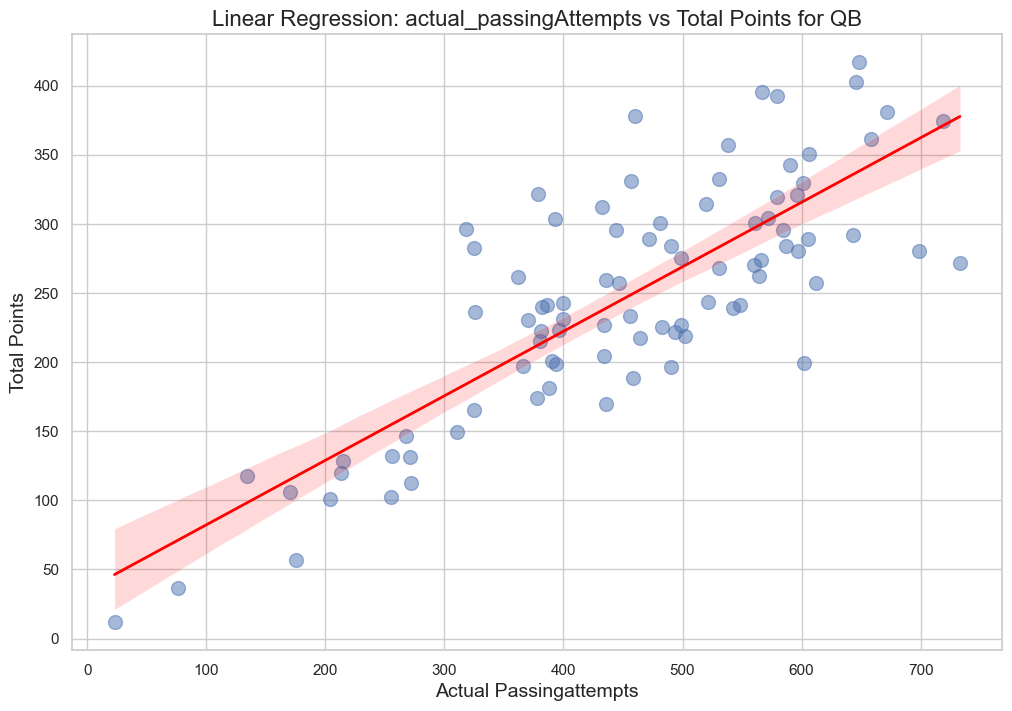


--- Visualization for TE, RB/WR/TE ---
Top combination for TE, RB/WR/TE: ('actual_receivingYards', 'actual_receivingTouchdowns', 'actual_receivingYardsPerReception')


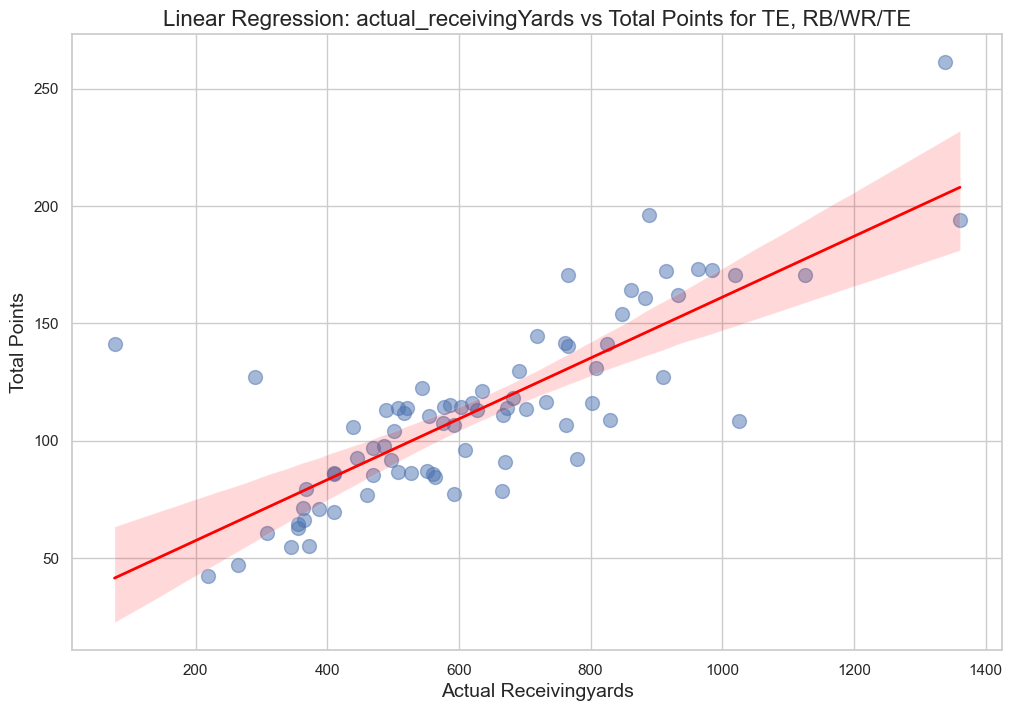


--- Visualization for RB, RB/WR ---
Top combination for RB, RB/WR: ('actual_rushingTouchdowns', 'actual_rushingAttempts', 'actual_rushingYards')


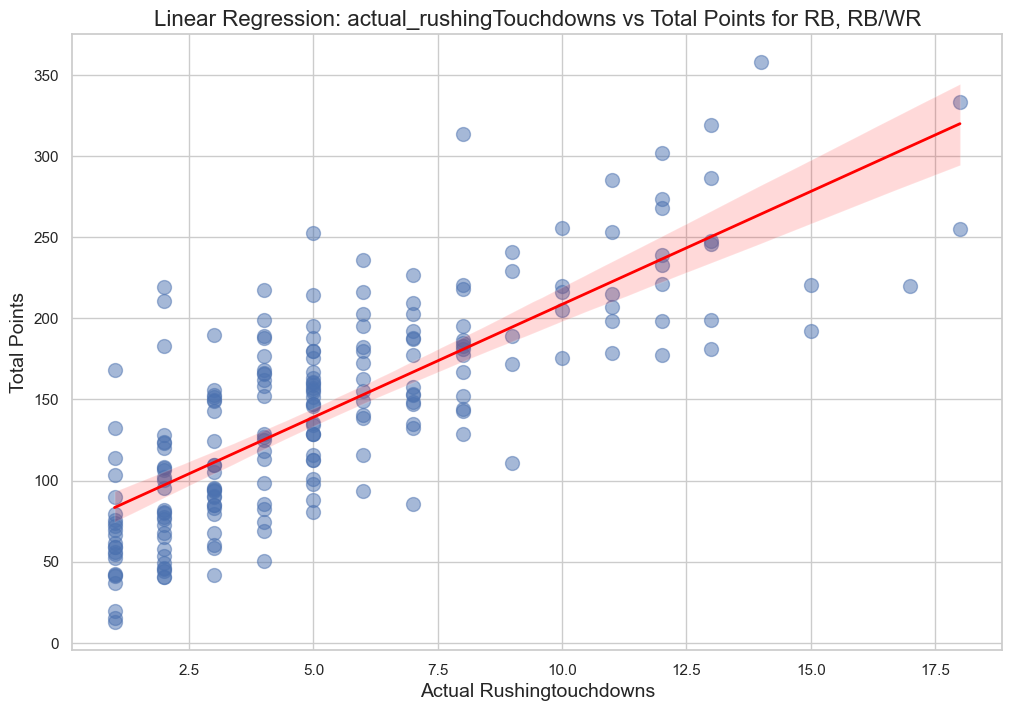


--- Visualization for WR, RB/WR ---
Top combination for WR, RB/WR: ('actual_receivingYards', 'actual_receivingTouchdowns', 'actual_receivingYardsAfterCatch')


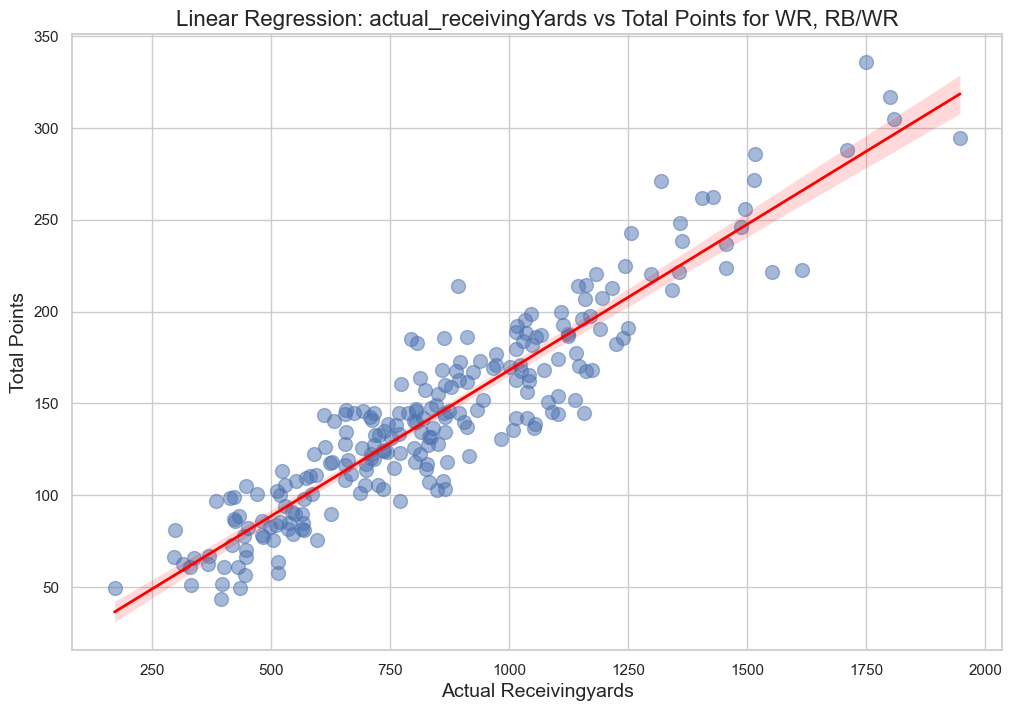


--- Visualization for D/ST ---
Top combination for D/ST: ('actual_defensiveInterceptions', 'actual_defensiveSacks', 'actual_defensivePointsAllowed')


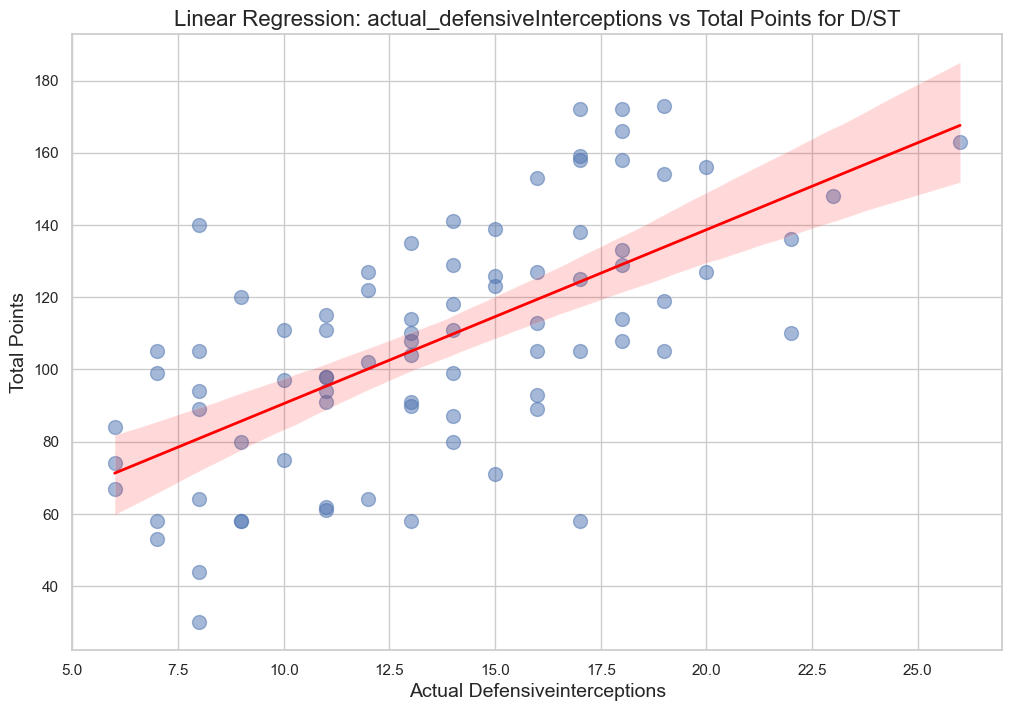


--- Visualization for K ---
Top combination for K: ('actual_attemptedFieldGoals', 'actual_missedFieldGoals', 'actual_madeExtraPoints')


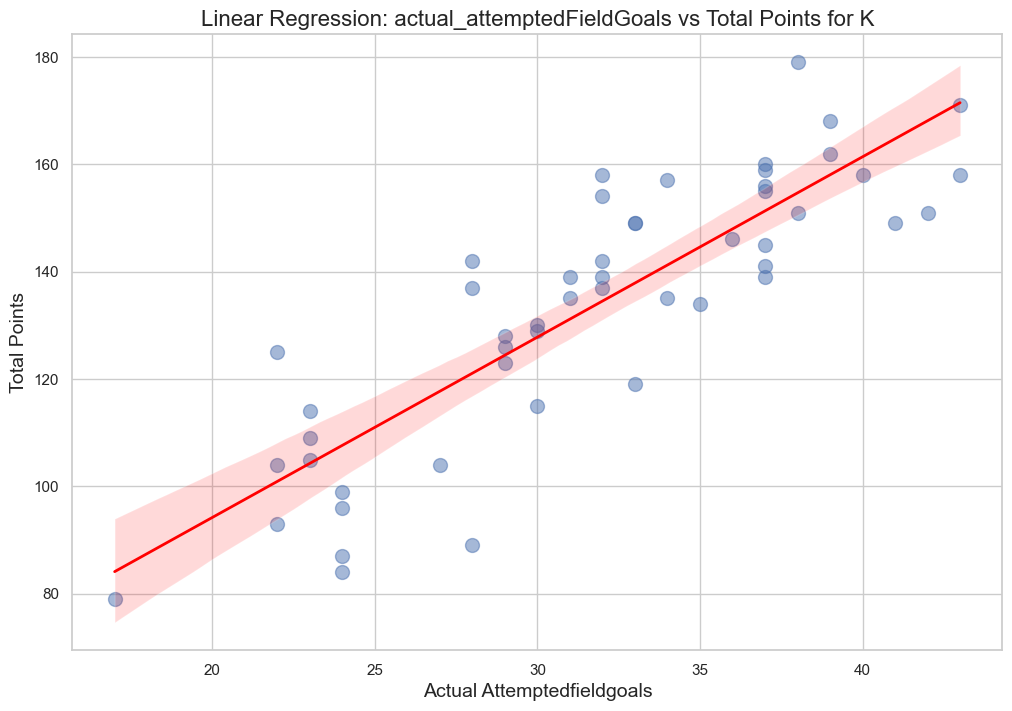

In [490]:
# Plotting Position Specific
for pos, top_10 in top_10_regression_results_specific.items():
    print(f"\n--- Visualization for {pos} ---")
    
    # Extract the top variable combination
    best_combo = top_10.iloc[0]['Variable_Combination']  # First entry is the best
    print(f"Top combination for {pos}: {best_combo}")
    
    # Prepare the data for the plot
    subset = position_dfs[pos][list(best_combo) + ['total_points']].dropna()
    
    # Pick the primary predictor for the regression line (first variable in the combination)
    primary_predictor = best_combo[0]
    
    # Plot the scatterplot with regression line
    plt.figure(figsize=(12, 8))
    sns.regplot(
        x=primary_predictor,
        y='total_points',
        data=subset,
        scatter=True,
        fit_reg=True,
        scatter_kws={'s': 100, 'alpha': 0.5},
        line_kws={'color': 'red', 'linewidth': 2}
    )
    
    # Set plot title and labels
    plt.title(f'Linear Regression: {primary_predictor} vs Total Points for {pos}', fontsize=16)
    plt.xlabel(primary_predictor.replace('_', ' ').title(), fontsize=14)
    plt.ylabel('Total Points', fontsize=14)
    
    # Show the plot
    plt.show()

These regression models yield much more interested results. The best predictor of QB points is actually stat line that yields no points: attempted passes. Tight Ends have the best adjusted R^2 from receiving yards which makes sense since tight ends have variability in their usage and often aren't targeted for the end zone. The prudent fantasy manager would look for tight ends that may be undervalued on a receiving yards stand point. Running backs often are the highest scoring players in the game and my model has found that rushing touchdowns is the best predictor in contrast to rushing yards. Drafting undervalued running backs that are used in red zone plays could be a prduent move. Wide receivers were found to have highly predictable performance based on receiving yards. The full regression model with an adjusted 0.9053 actually had three variables: receiving yards, touchdowns and yards after catch highlighting the importance of playmaking ability after the reception. Finally, defenses had interceptions again while kickers had attempted field goals which is very interesting considering kickers only get points from made field goals. Because of the relative accuracy of NFL kickers, it would serve the fantasy manager to find kickers who play on teams with high volumes of non-conversion in their opponents territory. 

#### Random Forest Draft Prediction Model

In this section, we are going to expand on the relationships that we found in the first regression section and attempt to build a more sophisticated model in order to build a successful team in a draft based not on the ESPN projected points, but rather the specific historical data including draft data from my league in order to tailor a drafting model to my league specifically. ni

In [425]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# Load and prepare data
def prepare_position_data(players_df, position_vars):
    position_dfs = {}
    for position, vars_list in position_vars.items():
        vars_list_clean = [var for var in vars_list if var != 'total_points']
        position_df = players_df[players_df['position'] == position].dropna(subset=['total_points'])
        position_df = position_df[vars_list_clean + ['total_points']]
        position_dfs[position] = position_df
    return position_dfs



# Train Random Forest models with evaluation metrics
def train_position_models(position_dfs):
    models = {}
    metrics = {}  # Dictionary to store MAE and R^2 for each position
    for position, df in position_dfs.items():
        X = df.drop(columns=['total_points'])
        y = df['total_points']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        # Train Random Forest
        rf = RandomForestRegressor(n_estimators=100, random_state=42)
        rf.fit(X_train, y_train)
        
        # Make predictions on the test set
        y_pred = rf.predict(X_test)
        
        # Calculate metrics
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        # Store the model and metrics
        models[position] = rf
        metrics[position] = {'MAE': mae, 'R²': r2}
        
        print(f"Trained Random Forest for {position}: MAE = {mae:.2f}, R² = {r2:.2f}")
    
    return models, metrics
# Predict points for 2024
def predict_points_2024(players_df, models, position_vars):
    predictions = []
    for position, model in models.items():
        features = [var for var in position_vars[position] if var in players_df.columns]
        pos_data = players_df[players_df['position'] == position][features].fillna(0)
        preds = model.predict(pos_data)
        temp_df = players_df[players_df['position'] == position].copy()
        temp_df['projected_points'] = preds
        predictions.append(temp_df)
    return pd.concat(predictions)

def simulate_snake_draft_intelligent(player_pool, my_team_position=1, num_teams=12, rounds=15):
    """
    Simulate a snake draft where all teams operate intelligently.
    Each team evaluates players based on projected points and positional needs.
    """
    draft_order = list(range(1, num_teams + 1))
    reverse_order = draft_order[::-1]
    teams = {team: [] for team in draft_order}
    position_constraints = {
        'QB': 2, 'RB': 4, 'WR': 4, 'TE': 2, 'K': 1, 'D/ST': 1
    }
    team_positions = {team: position_constraints.copy() for team in draft_order}
    player_pool = player_pool[player_pool['season'] == 2024].sort_values(by='projected_points', ascending=False).copy()
    player_pool['drafted'] = False

    def get_best_player(pos, available_players):
        """Get the best available player for a specific position."""
        pos_players = available_players[available_players['position'] == pos]
        if not pos_players.empty:
            return pos_players.iloc[0]
        return None

    for round_num in range(1, rounds + 1):
        # Determine draft order for this round (snake draft logic)
        current_order = draft_order if round_num % 2 != 0 else reverse_order
        for team_id in current_order:
            # Filter available players
            available_players = player_pool[player_pool['drafted'] == False]

            # Evaluate best positional fit for the team
            best_pick = None
            for position, need in team_positions[team_id].items():
                if need > 0:  # If the team still needs players for this position
                    best_pick = get_best_player(position, available_players)
                    if best_pick is not None:
                        break

            # If no positional need is found, pick the highest projected player
            if best_pick is None:
                best_pick = available_players.iloc[0]

            # Add the selected player to the team
            teams[team_id].append(best_pick)
            player_pool.at[best_pick.name, 'drafted'] = True
            team_positions[team_id][best_pick['position']] -= 1

            # Print draft pick for transparency
            if team_id == my_team_position:
                print(f"Round {round_num}, Your Team picks {best_pick['player_name']} ({best_pick['position']}) - {best_pick['projected_points']} pts")
            else:
                print(f"Round {round_num}, Team {team_id} picks {best_pick['player_name']} ({best_pick['position']}) - {best_pick['projected_points']} pts")

    # Return the user's team and all teams
    return teams[my_team_position], teams


# Main execution
if __name__ == "__main__":
    # Assume players_df is already loaded
    position_specific_vars = {
        'QB': ['projected_passingAttempts', 'projected_passingYards', 'projected_passingTouchdowns',
               'projected_passingInterceptions', 'projected_turnovers'],
        'RB': ['projected_rushingAttempts', 'projected_rushingYards', 'projected_rushingTouchdowns',
               'projected_receivingReceptions', 'projected_receivingYards'],
        'WR': ['projected_receivingReceptions', 'projected_receivingYards', 'projected_receivingTouchdowns',
               'projected_receivingTargets'],
        'TE': ['projected_receivingReceptions', 'projected_receivingYards', 'projected_receivingTouchdowns'],
        'K': ['projected_madeFieldGoals', 'projected_madeExtraPoints'],
        'D/ST': ['projected_defensiveTouchdowns', 'projected_defensiveSacks', 'projected_defensivePointsAllowed']
    }

    # Add common variables
    common_vars = ['avg_points', 'percent_owned', 'percent_started', 'actual_gamesPlayed']
    position_vars = {pos: common_vars + pos_vars for pos, pos_vars in position_specific_vars.items()}

    # Prepare position data and train models
    position_dfs = prepare_position_data(players_df, position_vars)
    models, metrics = train_position_models(position_dfs)
    # Print model performance metrics
    print("\n--- Model Metrics ---\n")
    for position, metric in metrics.items():
        print(f"{position} - MAE: {metric['MAE']:.2f}, R²: {metric['R²']:.2f}")

    # Predict points for 2024
    predicted_df = predict_points_2024(players_df, models, position_vars)

    # Simulate the intelligent draft
    print("\n--- Simulated Snake Draft ---\n")
    my_team_position = 1  # Set your team position (e.g., Team 1)
    my_team, all_teams = simulate_snake_draft_intelligent(predicted_df, my_team_position)

    # Display final team and total projected points
    my_team_df = pd.DataFrame(my_team)
    total_points = my_team_df['projected_points'].sum()
    print("\n--- My Final Drafted Team ---")
    print(my_team_df[['player_name', 'position', 'projected_points']])
    print(f"\nTotal Projected Points: {total_points}")

Trained Random Forest for QB: MAE = 19.18, R² = 0.93
Trained Random Forest for RB: MAE = 7.46, R² = 0.98
Trained Random Forest for WR: MAE = 5.94, R² = 0.97
Trained Random Forest for TE: MAE = 11.74, R² = 0.71
Trained Random Forest for K: MAE = 9.66, R² = 0.31
Trained Random Forest for D/ST: MAE = 6.50, R² = 0.94

--- Model Metrics ---

QB - MAE: 19.18, R²: 0.93
RB - MAE: 7.46, R²: 0.98
WR - MAE: 5.94, R²: 0.97
TE - MAE: 11.74, R²: 0.71
K - MAE: 9.66, R²: 0.31
D/ST - MAE: 6.50, R²: 0.94

--- Simulated Snake Draft ---

Round 1, Your Team picks Josh Allen (QB) - 325.38939999999985 pts
Round 1, Team 2 picks Joe Burrow (QB) - 321.2456 pts
Round 1, Team 3 picks Lamar Jackson (QB) - 319.7484000000003 pts
Round 1, Team 4 picks Jayden Daniels (QB) - 297.1809999999998 pts
Round 1, Team 5 picks Jalen Hurts (QB) - 296.7207999999998 pts
Round 1, Team 6 picks Baker Mayfield (QB) - 262.3519999999997 pts
Round 1, Team 7 picks Sam Darnold (QB) - 242.33100000000022 pts
Round 1, Team 8 picks Patrick Mah

This draft simulator for 2024 trained on data for the last 3 years finds that in the 1st round, players all pick QBs which is not at all the norm. This comes from how the random forest models are being built and ran. Each position has its own random forest model that is built from specific dataframes that have their position specific variables and total fantasy points. Then the data is split into 80% training, 20% test subsets and we are running 100 trees in the Random Forest Regressor. The model is finding which player statistics contribute the most to total points. The trained Random Forest model is then used to predict projected fantasy points for the 2024 season for every 2024 player. 

Then, I run a snake draft where each round is reverse order for the 12 teams involved. There are specific position requirements encoded. For each draft pick, the code will remove players already drafted by a team and only consider players whose positions the team still needs. Then they will rank the remaining player based on total projected points and draft the player with the highest value. As a result, we can clearly see that this will lead to QBs having the highest draft order since they have the highest value. With that being said, we need to find another metric that better incorporates the opportunity cost of drafting a player compared to what other teams may do. 

As a result, this next model will sort players by an adjusted-position value which takes into account the positional scarcity by comparing each players projected points to the average replacement-level player at that same position. Replacement-level players are players that typically would not start and we would subtract those points from each player's projected points. Here is a new draft with that:

In [433]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# Load and prepare data
def prepare_position_data(players_df, position_vars):
    position_dfs = {}
    for position, vars_list in position_vars.items():
        vars_list_clean = [var for var in vars_list if var != 'total_points']
        position_df = players_df[players_df['position'] == position].dropna(subset=['total_points'])
        position_df = position_df[vars_list_clean + ['total_points']]
        position_dfs[position] = position_df
    return position_dfs
def get_valid_positions(drafted_positions):
    """
    Returns valid positions to draft based on already drafted positions.
    Adjust constraints based on league rules or strategy.
    """
    # League positional constraints (adjust as needed)
    position_constraints = {
        'QB': 2,   # Max 2 QBs
        'RB': 6,   # Max 6 RBs
        'WR': 6,   # Max 6 WRs
        'TE': 2,   # Max 2 TEs
        'K': 1,    # Max 1 Kicker
        'D/ST': 1  # Max 1 Defense/Special Teams
    }

    # Count currently drafted positions
    drafted_counts = {pos: drafted_positions.count(pos) for pos in position_constraints.keys()}

    # Identify valid positions for the next draft pick
    valid_positions = [
        pos for pos, max_count in position_constraints.items()
        if drafted_counts.get(pos, 0) < max_count
    ]

    return valid_positions


# Train Random Forest models with evaluation metrics
def train_position_models(position_dfs):
    models = {}
    metrics = {}  # Dictionary to store MAE and R^2 for each position
    for position, df in position_dfs.items():
        X = df.drop(columns=['total_points'])
        y = df['total_points']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        # Train Random Forest
        rf = RandomForestRegressor(n_estimators=100, random_state=42)
        rf.fit(X_train, y_train)
        
        # Make predictions on the test set
        y_pred = rf.predict(X_test)
        
        # Calculate metrics
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        # Store the model and metrics
        models[position] = rf
        metrics[position] = {'MAE': mae, 'R²': r2}
        
        print(f"Trained Random Forest for {position}: MAE = {mae:.2f}, R² = {r2:.2f}")
    
    return models, metrics
# Predict points for 2024
def predict_points_2024(players_df, models, position_vars):
    predictions = []
    for position, model in models.items():
        features = [var for var in position_vars[position] if var in players_df.columns]
        pos_data = players_df[players_df['position'] == position][features].fillna(0)
        preds = model.predict(pos_data)
        temp_df = players_df[players_df['position'] == position].copy()
        temp_df['projected_points'] = preds
        predictions.append(temp_df)
    return pd.concat(predictions)

def calculate_positional_adjusted_value(players_df, replacement_levels):
    """
    Calculate Positional Adjusted Value (PAV) for each player based on replacement level.
    """
    players_df['PAV'] = 0  # Initialize PAV column
    
    for position, replacement_level in replacement_levels.items():
        pos_df = players_df[players_df['position'] == position]
        avg_replacement_points = pos_df.nlargest(replacement_level, 'projected_points')['projected_points'].min()
        players_df.loc[players_df['position'] == position, 'PAV'] = (
            players_df.loc[players_df['position'] == position, 'projected_points'] - avg_replacement_points
        )
    
    return players_df

def simulate_snake_draft_with_pav(predicted_df, my_team_position, num_teams=12, rounds=15):
    """
    Simulates a snake draft using positional adjusted value (PAV).
    Limits player pool to season 2024 and enforces positional constraints.
    """
    # Limit the player pool to 2024 season
    player_pool = predicted_df[predicted_df['season'] == 2024].copy()

    # Sort the player pool by PAV (descending)
    player_pool = player_pool.sort_values('PAV', ascending=False).reset_index(drop=True)

    teams = {i: [] for i in range(1, num_teams + 1)}
    drafted_players = set()  # To track drafted players

    for round_num in range(1, rounds + 1):
        # Snake draft order
        draft_order = list(range(1, num_teams + 1)) if round_num % 2 != 0 else list(range(num_teams, 0, -1))

        for team in draft_order:
            # Filter available players
            available_players = player_pool[~player_pool['player_name'].isin(drafted_players)]

            # Apply positional constraints
            drafted_positions = [player['position'] for player in teams[team]]
            valid_positions = get_valid_positions(drafted_positions)
            available_players = available_players[available_players['position'].isin(valid_positions)]

            # Check if there are still players left to draft
            if available_players.empty:
                print(f"Team {team} could not draft a player in round {round_num} due to constraints.")
                continue

            # Select player with highest PAV
            best_player = available_players.iloc[0]
            drafted_players.add(best_player['player_name'])
            teams[team].append(best_player)

    # Extract my team
    my_team = teams[my_team_position]

    return my_team, teams


# Main execution
if __name__ == "__main__":
    # Define replacement levels by position (adjust based on league settings)
    replacement_levels = {'QB': 12, 'RB': 24, 'WR': 36, 'TE': 12, 'K': 12, 'D/ST': 12}

    # Position-specific variables
    position_specific_vars = {
        'QB': ['projected_passingAttempts', 'projected_passingYards', 'projected_passingTouchdowns',
               'projected_passingInterceptions', 'projected_turnovers'],
        'RB': ['projected_rushingAttempts', 'projected_rushingYards', 'projected_rushingTouchdowns',
               'projected_receivingReceptions', 'projected_receivingYards'],
        'WR': ['projected_receivingReceptions', 'projected_receivingYards', 'projected_receivingTouchdowns',
               'projected_receivingTargets'],
        'TE': ['projected_receivingReceptions', 'projected_receivingYards', 'projected_receivingTouchdowns'],
        'K': ['projected_madeFieldGoals', 'projected_madeExtraPoints'],
        'D/ST': ['projected_defensiveTouchdowns', 'projected_defensiveSacks', 'projected_defensivePointsAllowed']
    }

    # Add common variables
    common_vars = ['avg_points', 'percent_owned', 'percent_started', 'actual_gamesPlayed']
    position_vars = {pos: common_vars + pos_vars for pos, pos_vars in position_specific_vars.items()}

    # Prepare position data and train models
    position_dfs = prepare_position_data(players_df, position_vars)
    models, metrics = train_position_models(position_dfs)

    # Print model performance metrics
    for position, metric in metrics.items():
        print(f"{position} - MAE: {metric['MAE']:.2f}, R²: {metric['R²']:.2f}")

    # Predict points for 2024
    predicted_df = predict_points_2024(players_df, models, position_vars)

    # Calculate Positional Adjusted Value (PAV)
    predicted_df = calculate_positional_adjusted_value(predicted_df, replacement_levels)

    # Simulate the snake draft with PAV
    my_team_position = 1  # Set your team position (e.g., Team 1)
    my_team, all_teams = simulate_snake_draft_with_pav(predicted_df, my_team_position)

    # Display final team and total projected points
    my_team_df = pd.DataFrame(my_team)
    total_points = my_team_df['projected_points'].sum()
    print("\n--- My Final Drafted Team ---")
    print(my_team_df[['player_name', 'position', 'projected_points', 'PAV']])

Trained Random Forest for QB: MAE = 19.18, R² = 0.93
Trained Random Forest for RB: MAE = 7.46, R² = 0.98
Trained Random Forest for WR: MAE = 5.94, R² = 0.97
Trained Random Forest for TE: MAE = 11.74, R² = 0.71
Trained Random Forest for K: MAE = 9.66, R² = 0.31
Trained Random Forest for D/ST: MAE = 6.50, R² = 0.94
QB - MAE: 19.18, R²: 0.93
RB - MAE: 7.46, R²: 0.98
WR - MAE: 5.94, R²: 0.97
TE - MAE: 11.74, R²: 0.71
K - MAE: 9.66, R²: 0.31
D/ST - MAE: 6.50, R²: 0.94
Team 12 could not draft a player in round 15 due to constraints.

--- My Final Drafted Team ---
            player_name position  projected_points       PAV
0         Ja'Marr Chase       WR          266.8484   70.5064
23     David Montgomery       RB          196.8780  -21.8780
24          Jonnu Smith       TE          139.0270  -25.0680
44     Chase McLaughlin        K          112.5400  -41.3200
48        Seahawks D/ST     D/ST          102.5000  -43.9200
71         Malik Nabers       WR          139.7480  -56.5940
73       

/var/folders/91/1rrq4vx1605_wpsqxthbhcz00000gn/T/ipykernel_11857/2363925486.py:89: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[   0.       62.7122  -69.1756 -186.6584   14.2888 -105.3238  -32.4838
   -5.2704  -93.8644 -127.5856  -11.9634 -143.461    21.8582   25.5546
  -19.807  -116.7558  -22.9422    3.8778   54.5146  -49.3344  -56.7332
  -31.5256  -84.6594  -98.8274  -49.5768 -128.6242 -222.2734 -147.3932
  -42.4462   11.2626  -38.4242   22.8698 -106.4026 -205.8322  -94.8896
 -250.0136   54.324   -36.2774  -46.5354 -109.8514 -153.8472  -41.5668
  -77.2332 -101.379  -181.7134  -49.7792  -54.5482   15.2008   -8.5844
  -62.4978  -90.0052  -24.1026  -51.4906    3.4652 -217.468  -295.0534
 -113.7714  -83.9936 -128.584  -188.0768 -206.4528 -107.0006  -11.8964
  -96.4614  -38.5264  -61.304  -150.1392 -106.2596  -33.2578 -201.5124
 -102.595  -196.8568  -68.0868   -5.0494 -202.464  -123.4632 -196.2214
 -106.6

In [434]:
print("My Final Drafted Team!")
print(my_team_df[['player_name', 'position', 'projected_points', 'PAV']])

My Final Drafted Team!
            player_name position  projected_points       PAV
0         Ja'Marr Chase       WR          266.8484   70.5064
23     David Montgomery       RB          196.8780  -21.8780
24          Jonnu Smith       TE          139.0270  -25.0680
44     Chase McLaughlin        K          112.5400  -41.3200
48        Seahawks D/ST     D/ST          102.5000  -43.9200
71         Malik Nabers       WR          139.7480  -56.5940
73           A.J. Brown       WR          138.7368  -57.6052
97           DK Metcalf       WR          125.7870  -70.5550
98        Jakobi Meyers       WR          125.3620  -70.9800
126         Evan Engram       TE           67.8570  -96.2380
127        Kyler Murray       QB          233.7654  -96.6734
150      Justin Herbert       QB          206.9756 -123.4632
151  Travis Etienne Jr.       RB           93.7864 -124.9696
174         Trey Benson       RB           42.0650 -176.6910
175        Tyjae Spears       RB           39.4226 -179.3334


This looks realistic! Ja'Marr Chase is definitely a realistic valid choice. Interestingly, a D/ST and Kicker came in the top 7 rounds which generally never happens. This is probably a function that the PAV is being calculated as a simple difference which doesn't penalize kickers and D/ST enough since both of those positions usually result in lesser points. However, generally, I think this model adequately captures the nuances of drafting which is impressive in its own right.

#### Next Steps & Discussion

Summary of Findings

In my analysis of my ESPN Fantasy Football league, I evaluated various predictive models and positional metrics to optimize player selection and draft strategies. The results demonstrated strong predictive performance for positions like running backs and wide receivers while there was more variability in positions like defenses/special teams and quarterbacks. The models used were Linear Univariate and Multi-variate Regression as well as a Random Forest Regression. 

Key Findings:
1. Strong predictive accuracy was achieved for RBs and WRs with high adjusted R^2 that highlighted statistics that may not seem intuitive in determining total points for as the dominant predictor such as touchdowns vs receiving yards for running backs and wide receivers respectively
2. Volume metrics consistently emerged as top predictors across all positions. 
3. Draft strategies that were uncovered most importantly revealed that RBs and WRs offered the greatest return on early-round draft picks due to their positional scarcity and high variability among replacement-level players.
4. You can use later rounds to draft QBs without substantial drop-offs in projected performance

Next Steps
1. Expanding the dataset to include players that were not on rosters at the end of the season as well as incorporating other public leagues that may be available to compile as much data as possible. 
2. Add game schedule strength as a contextual feature in my Random Forest Model as a factor in deciding to draft a player as well as injury health. 
3. Expand the analysis to analyze mid-season transactions such as trades and waiver wire adds/drops to weigh their effectivenss. While I showed that the # of trades alone has no bearing on final standing position, the quality of trades was not something that was measured. 

Conclusion
This analysis proved to be particularly insightful, especially as a long-time fantasy football fan, this study helped answer questions that I had been wondering for years. Chiefly, is my league good at drafting and is ESPN any good at predicting who drafted well? The answer to both of these questions is no which means next year, I hope that the model that I started for this project can become quite comprehensive and perhaps draft for me once I incorporate these additional factors and can lead to my first fantasy victory.